# Restaurant Sales report
**EDA and Analysis Ideas for restaurant business**

# File Description:

#### File Format: CSV
#### Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
#### Data Size: This file contains 1000 rows and 10 columns.
#### Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.
#### Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.
#### Date of Last Update: The dataset was last updated on March 31, 2023.
#### Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.
#### Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.

## Data Description:
This dataset captures sales transactions from a local restaurant near my home. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

### Columns:

    order_id: a unique identifier for each order.
    date: date of the transaction.
    item_name: name of the food.
    item_type: category of item (Fastfood or Beverages).
    item_price: price of the item for 1 quantity.
    Quantity: how much quantity the customer orders.
    transaction_amount: the total amount paid by customers.
    transaction_type: payment method (cash, online, others).
    received_by: gender of the person handling the transaction.
    time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

# Import libraries and read the dataset

In [196]:
import numpy as np
import pandas as pd

In [197]:
df=pd.read_csv('Balaji Fast Food Sales (1).csv')

In [198]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


# Basic understanding of dataset

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [201]:
print('Total no.of rows:',df.shape[0])
print('Total no.of columns:',df.shape[1])

Total no.of rows: 1000
Total no.of columns: 10


In [202]:
print('There are',df.size,'values')

There are 10000 values


# Inference

# Find if there is any duplicate data

In [205]:
print('No.of duplicated rows:',df.duplicated().sum())

No.of duplicated rows: 0


In [206]:
# There is no duplicates

# Check for datatype and change if necessary

In [208]:
df['date']

0      07-03-2022
1       8/23/2022
2      11/20/2022
3      02-03-2023
4      10-02-2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

In [209]:
df['date']=df['date'].str.replace('-','/') #inorder to change date into a similar format, we replace '-' to '/'

In [210]:
df['date']

0      07/03/2022
1       8/23/2022
2      11/20/2022
3      02/03/2023
4      10/02/2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

In [211]:
df['date']=pd.to_datetime(df['date'])

In [212]:
df['date']

0     2022-07-03
1     2022-08-23
2     2022-11-20
3     2023-02-03
4     2022-10-02
         ...    
995   2023-03-19
996   2022-09-20
997   2023-01-26
998   2022-08-27
999   2022-05-29
Name: date, Length: 1000, dtype: datetime64[ns]

# Remove unwanted columns

# Separate numeric and categoric columns

In [215]:
col = df.columns.to_list()

In [216]:
num = df.select_dtypes(include=np.number).columns.to_list()

In [217]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()

In [218]:
print('Numeric variables are:',num)

Numeric variables are: ['order_id', 'item_price', 'quantity', 'transaction_amount']


In [219]:
print('categoric variables are:',cat)

categoric variables are: ['date', 'item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']


In [220]:
df[num]

,order_id,item_price,quantity,transaction_amount
0,1,20,13,260
1,2,20,15,300
2,3,20,1,20
3,4,25,6,150
4,5,25,8,200
...,...,...,...,...
995,996,50,10,500
996,997,60,7,420
997,998,60,13,780
998,999,20,5,100


In [221]:
df[cat]

,date,item_name,item_type,transaction_type,received_by,time_of_sale
0,2022-07-03,Aalopuri,Fastfood,NaN,Mr.,Night
1,2022-08-23,Vadapav,Fastfood,Cash,Mr.,Afternoon
2,2022-11-20,Vadapav,Fastfood,Cash,Mr.,Afternoon
3,2023-02-03,Sugarcane juice,Beverages,Online,Mr.,Night
4,2022-10-02,Sugarcane juice,Beverages,Online,Mr.,Evening
...,...,...,...,...,...,...
995,2023-03-19,Frankie,Fastfood,NaN,Mrs.,Evening
996,2022-09-20,Sandwich,Fastfood,NaN,Mr.,Evening
997,2023-01-26,Sandwich,Fastfood,NaN,Mr.,Evening
998,2022-08-27,Panipuri,Fastfood,NaN,Mrs.,Afternoon


# Descriptive Stats Analysis

### Measure of central tendency

In [224]:
# For numerical columns

In [225]:
# Mean
for i in num:
    print('Mean of column',i,'is :',df[i].mean())
    print()

Mean of column order_id is : 500.5

Mean of column item_price is : 33.315

Mean of column quantity is : 8.162

Mean of column transaction_amount is : 275.23



In [226]:
# Median
for i in num:
    print('Median of column',i,'is :',df[i].median())
    print()

Median of column order_id is : 500.5

Median of column item_price is : 25.0

Median of column quantity is : 8.0

Median of column transaction_amount is : 240.0



In [227]:
# Mode
for i in num:
    print('Mode of column',i,'is :',df[i].mode())
    print()
    print()

Mode of column order_id is : 0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: order_id, Length: 1000, dtype: int64


Mode of column item_price is : 0    20
Name: item_price, dtype: int64


Mode of column quantity is : 0    13
Name: quantity, dtype: int64


Mode of column transaction_amount is : 0    300
Name: transaction_amount, dtype: int64




In [228]:
# For categorical columns

In [229]:
# Mode
for i in cat:
    print('Mode of column',i,'is :',df[i].mode())
    print()
    print()

Mode of column date is : 0   2022-05-09
1   2022-08-31
2   2022-10-11
Name: date, dtype: datetime64[ns]


Mode of column item_name is : 0    Cold coffee
Name: item_name, dtype: object


Mode of column item_type is : 0    Fastfood
Name: item_type, dtype: object


Mode of column transaction_type is : 0    Cash
Name: transaction_type, dtype: object


Mode of column received_by is : 0    Mr.
Name: received_by, dtype: object


Mode of column time_of_sale is : 0    Afternoon
1        Night
Name: time_of_sale, dtype: object




In [230]:
# Value counts
for i in cat:
    print('Count of each category of column',i,'is :',(df[i].value_counts(normalize=True))*100)
    print()

Count of each category of column date is : date
2022-10-11    0.8
2022-05-09    0.8
2022-08-31    0.8
2023-03-19    0.7
2023-02-03    0.7
             ... 
2022-06-12    0.1
2022-04-15    0.1
2022-05-17    0.1
2022-07-23    0.1
2022-06-14    0.1
Name: proportion, Length: 348, dtype: float64

Count of each category of column item_name is : item_name
Cold coffee        16.1
Sugarcane juice    15.3
Panipuri           15.0
Frankie            13.9
Aalopuri           13.4
Vadapav            13.4
Sandwich           12.9
Name: proportion, dtype: float64

Count of each category of column item_type is : item_type
Fastfood     68.6
Beverages    31.4
Name: proportion, dtype: float64

Count of each category of column transaction_type is : transaction_type
Cash      53.303471
Online    46.696529
Name: proportion, dtype: float64

Count of each category of column received_by is : received_by
Mr.     51.2
Mrs.    48.8
Name: proportion, dtype: float64

Count of each category of column time_of_sale is : 

In [231]:
# Unique values
for i in cat:
    print('Unique categories in column',i,'is :',df[i].unique())
    print()

Unique categories in column date is : <DatetimeArray>
['2022-07-03 00:00:00', '2022-08-23 00:00:00', '2022-11-20 00:00:00',
 '2023-02-03 00:00:00', '2022-10-02 00:00:00', '2022-11-14 00:00:00',
 '2022-05-03 00:00:00', '2022-12-22 00:00:00', '2022-06-10 00:00:00',
 '2022-09-16 00:00:00',
 ...
 '2023-03-06 00:00:00', '2023-02-21 00:00:00', '2023-02-19 00:00:00',
 '2023-01-07 00:00:00', '2022-09-24 00:00:00', '2022-06-29 00:00:00',
 '2022-11-21 00:00:00', '2023-01-22 00:00:00', '2023-03-30 00:00:00',
 '2022-06-14 00:00:00']
Length: 348, dtype: datetime64[ns]

Unique categories in column item_name is : ['Aalopuri' 'Vadapav' 'Sugarcane juice' 'Panipuri' 'Frankie' 'Sandwich'
 'Cold coffee']

Unique categories in column item_type is : ['Fastfood' 'Beverages']

Unique categories in column transaction_type is : [nan 'Cash' 'Online']

Unique categories in column received_by is : ['Mr.' 'Mrs.']

Unique categories in column time_of_sale is : ['Night' 'Afternoon' 'Evening' 'Morning' 'Midnight']



### Measures of dispersion

In [233]:
# For numerical column

In [234]:
# Range
for i in num:
    print('Range of column',i,'is :',df[i].max()-df[i].min())
    print()

Range of column order_id is : 999

Range of column item_price is : 40

Range of column quantity is : 14

Range of column transaction_amount is : 880



In [235]:
# Variance
for i in num:
    print('Variance of column',i,'is :',df[i].var())
    print()

Variance of column order_id is : 83416.66666666667

Variance of column item_price is : 222.65843343343138

Variance of column quantity is : 19.475231231231273

Variance of column transaction_amount is : 41780.57767767783



In [236]:
# Std.deviation
for i in num:
    print('Standard deviation of column',i,'is :',df[i].std())
    print()

Standard deviation of column order_id is : 288.8194360957494

Standard deviation of column item_price is : 14.921743645882387

Standard deviation of column quantity is : 4.413075031226104

Standard deviation of column transaction_amount is : 204.4029786418922



In [237]:
# Inter Quartile Range - IQR
for i in num:
    print('IQR value of column',i,'is :',df[i].quantile(0.75)-df[i].quantile(0.25))
    print()

IQR value of column order_id is : 499.5

IQR value of column item_price is : 30.0

IQR value of column quantity is : 8.0

IQR value of column transaction_amount is : 240.0



### Measures of shape

In [239]:
# Skewness
for i in num:
    print('Skewness value of column',i,'is :',df[i].skew())
    print()

Skewness value of column order_id is : 0.0

Skewness value of column item_price is : 0.6250044803515558

Skewness value of column quantity is : -0.05129947454908782

Skewness value of column transaction_amount is : 1.052643178230624



In [240]:
# Inference for skewness
# order_id column is zero skewed
# item_price column is positively skewed
# quantity column is slighltly negative skewed
# transaction amount column is positively skewed

In [241]:
# Kurtosis
for i in num:
    print('Kurtosis value of column',i,'is :',df[i].kurt())
    print()

Kurtosis value of column order_id is : -1.2

Kurtosis value of column item_price is : -1.173262217524134

Kurtosis value of column quantity is : -1.2416861155903576

Kurtosis value of column transaction_amount is : 0.6554065709917558



In [242]:
# Inference for kurtosis
# All the columns are platy kurtic

# Covariance

In [244]:
df[num].cov()

,order_id,item_price,quantity,transaction_amount
order_id,83416.666667,159.577077,13.185185,2595.785786
item_price,159.577077,222.658433,3.316286,1943.606156
quantity,13.185185,3.316286,19.475231,660.122863
transaction_amount,2595.785786,1943.606156,660.122863,41780.577678


In [245]:
# Inference for covariance
# All the columns are positively related since they are equally varying

# Correlation

In [247]:
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


In [248]:
# Inference for correlation
# All the columns are postively correlated while some of the columns are strongly positively correlated
# strongly correlated columns -> item_price and transaction_amount, quantity and transaction_amount

# 5 Point summary

In [250]:
df[num].describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [251]:
df[cat].describe(include='object')

,item_name,item_type,transaction_type,received_by,time_of_sale
count,1000,1000,893,1000,1000
unique,7,2,2,2,5
top,Cold coffee,Fastfood,Cash,Mr.,Night
freq,161,686,476,512,205


# Data Visualisation

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [254]:
plt.rcParams['figure.figsize']=[15,8]

In [255]:
from warnings import filterwarnings
filterwarnings('ignore')

# Univariate analysis for categorical columns

In [257]:
cat

['date',
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

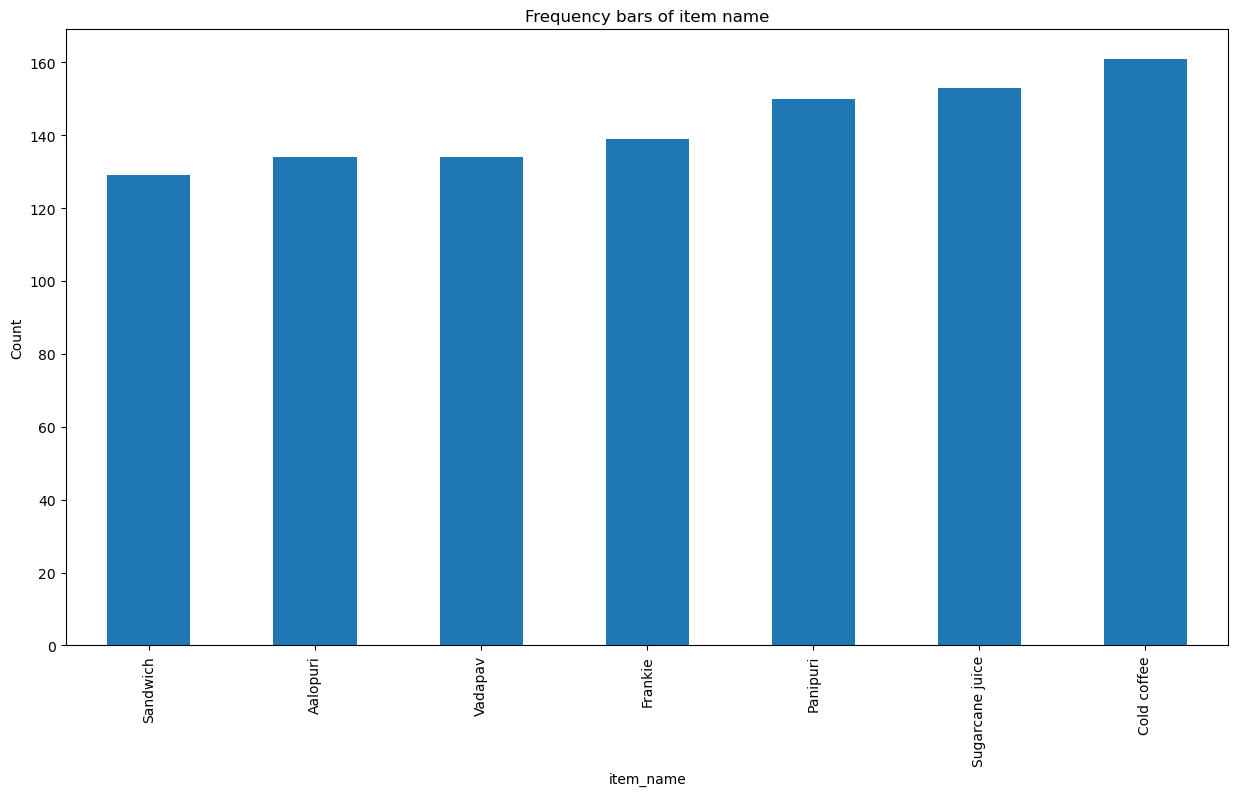

In [258]:
df['item_name'].value_counts().sort_values(ascending=True).plot(kind='bar')
plt.title('Frequency bars of item name')
plt.ylabel('Count')
plt.show()

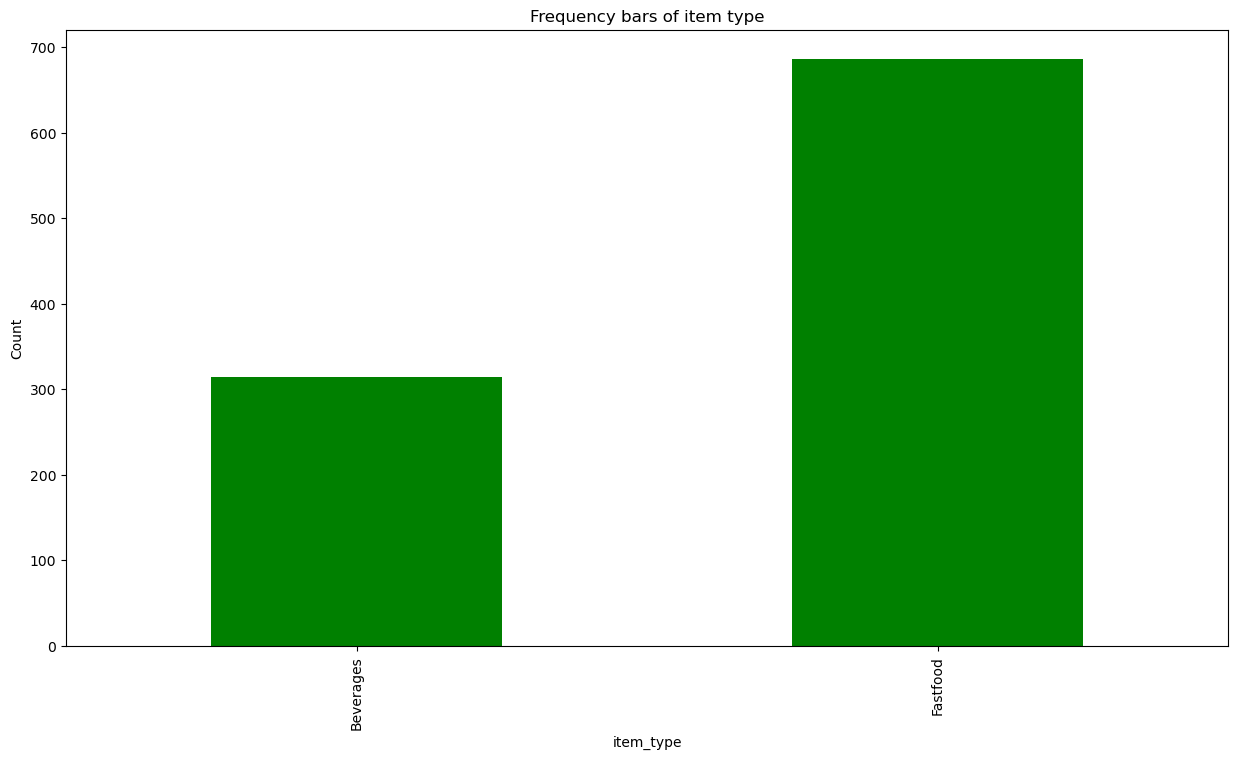

In [259]:
df['item_type'].value_counts().sort_values(ascending=True).plot(kind='bar',color='green')
plt.title('Frequency bars of item type')
plt.ylabel('Count')
plt.show()

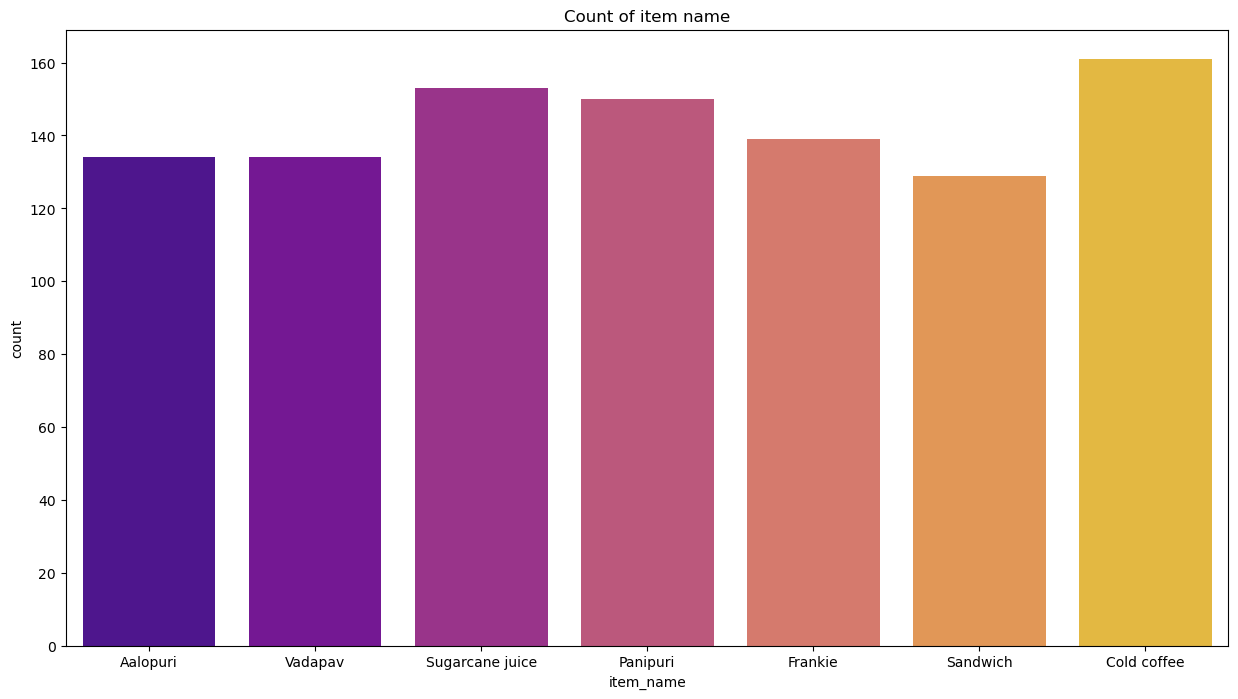

In [260]:
sns.countplot(x=df['item_name'],palette='plasma')
plt.title('Count of item name')
plt.show()

In [261]:
cat.remove('date')

# Subplot

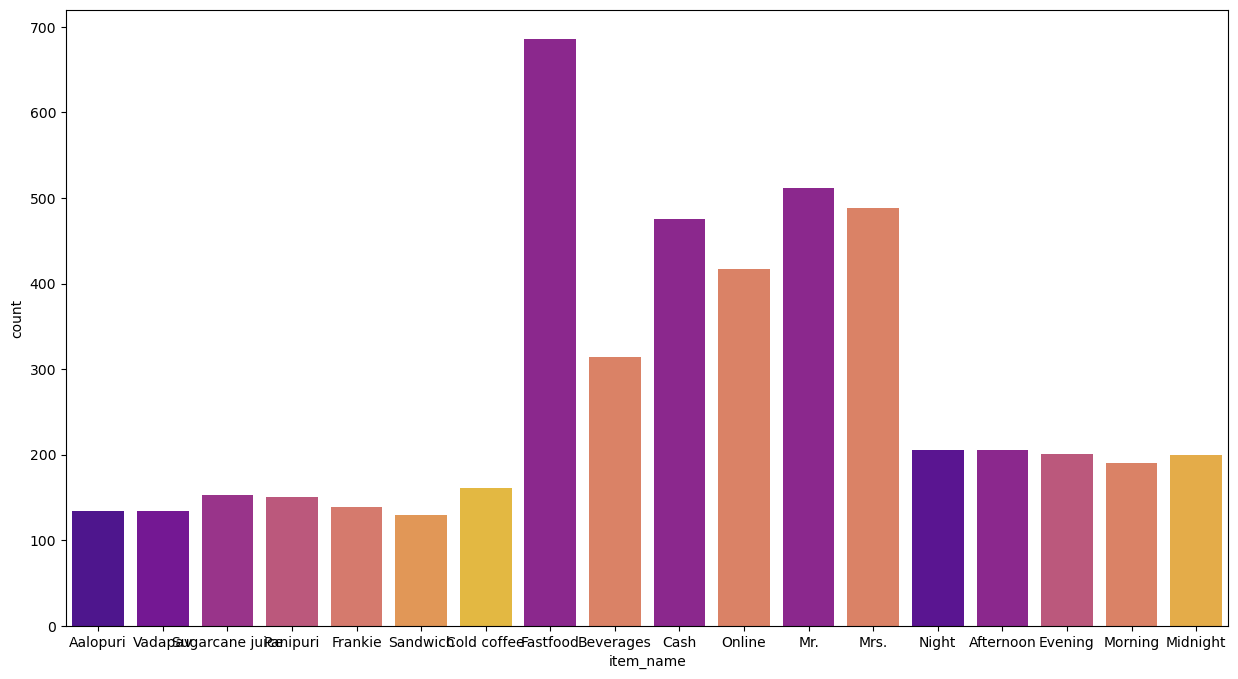

In [263]:
for i in cat:
    sns.countplot(x=df[i],palette='plasma')

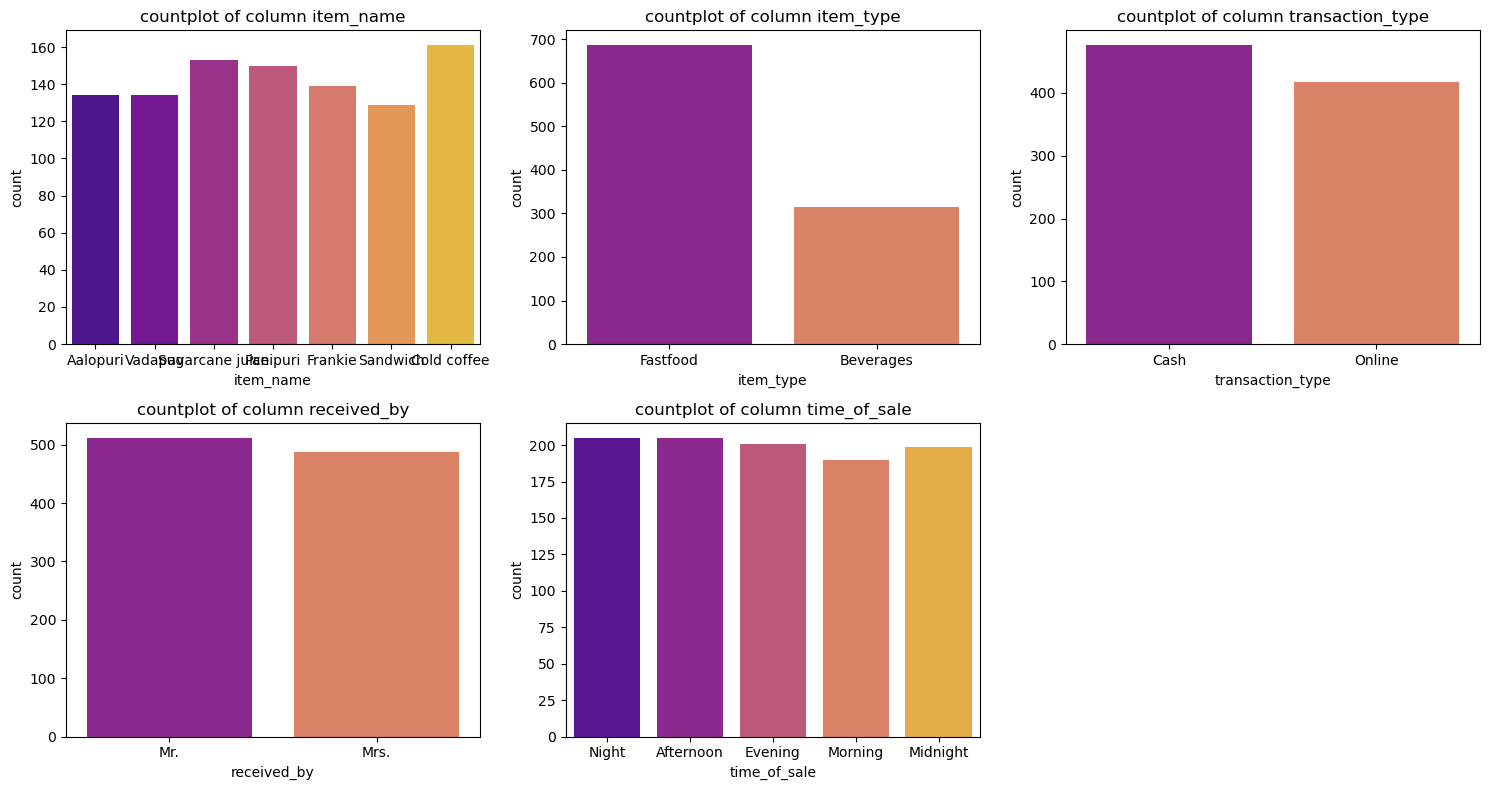

In [264]:
t=1
for i in cat:
    plt.subplot(2,3,t)
    sns.countplot(x=df[i],palette='plasma')
    plt.title(f'countplot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

# Pieplot

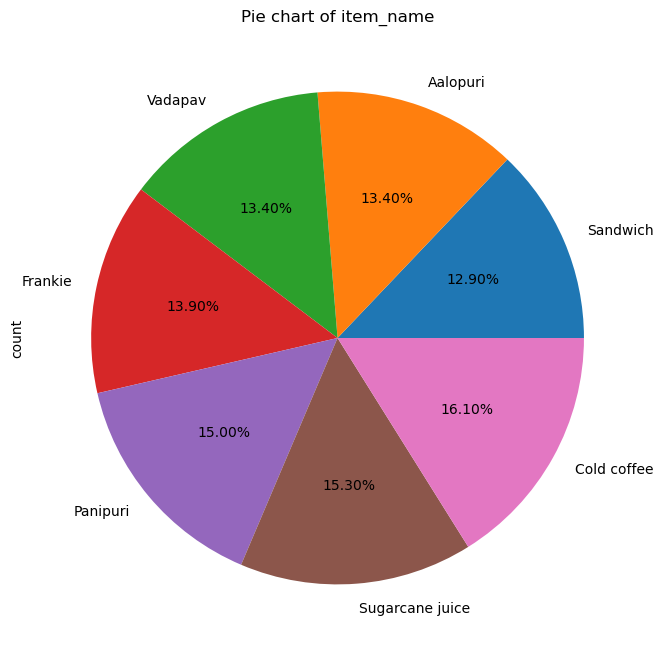

In [266]:
df['item_name'].value_counts().sort_values().plot(kind='pie',autopct='%.2f%%')
plt.title('Pie chart of item_name')
plt.show()

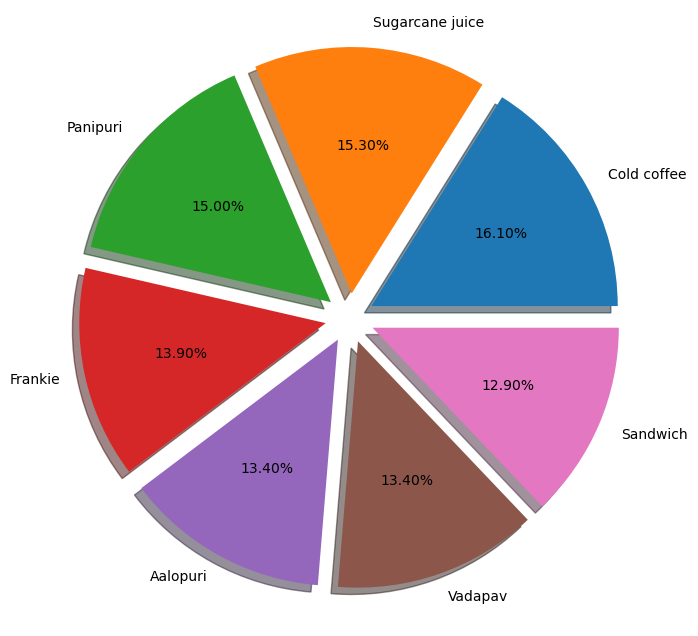

In [267]:
plt.pie(df['item_name'].value_counts(),labels=df['item_name'].value_counts().index,
       autopct='%.2f%%',shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

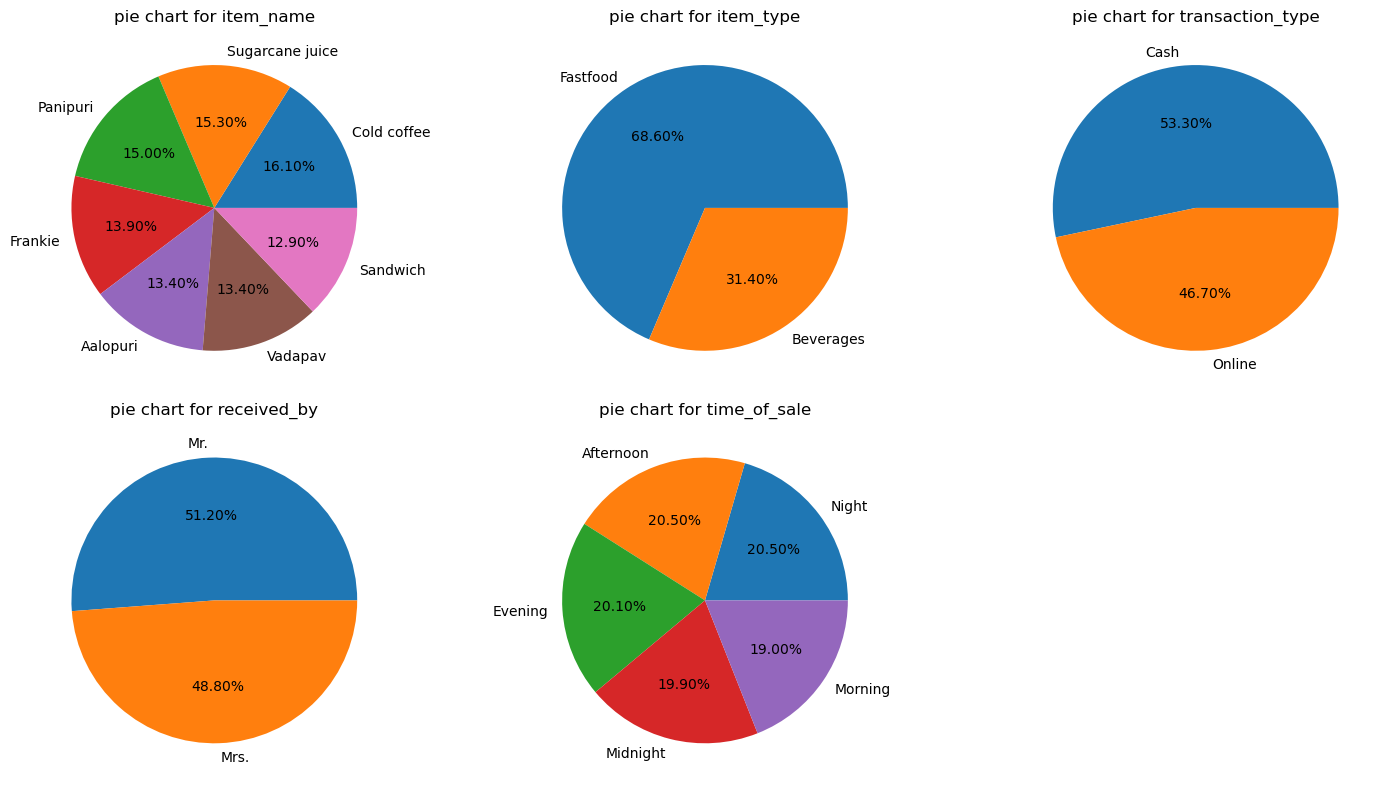

In [268]:
t=1
for i in cat:
    plt.subplot(2,3,t)
    plt.pie(df[i].value_counts(),labels=df[i].value_counts().index,
           autopct='%.2f%%')
    plt.title(f'pie chart for {i}')
    t+=1
plt.tight_layout()
plt.show()

# Univariate analysis on numerical columns

In [270]:
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

In [271]:
#Histplot

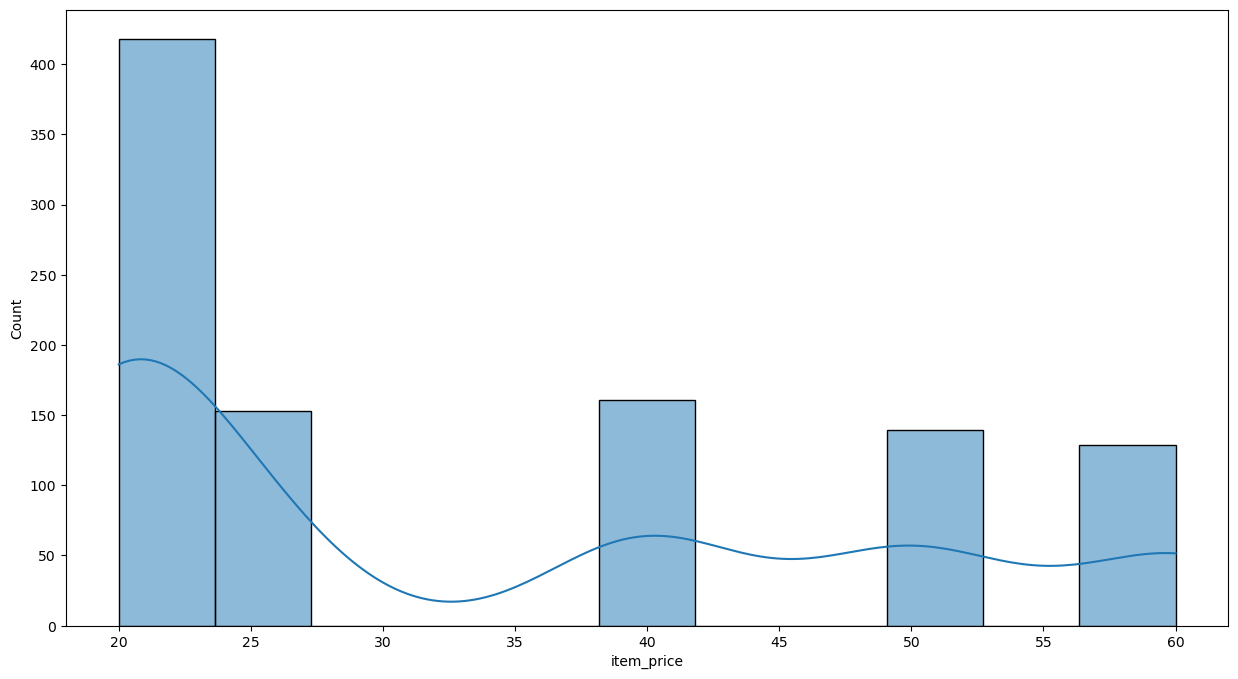

In [272]:
sns.histplot(df['item_price'],kde=1) # kde=distribution(kernel density)
plt.show()

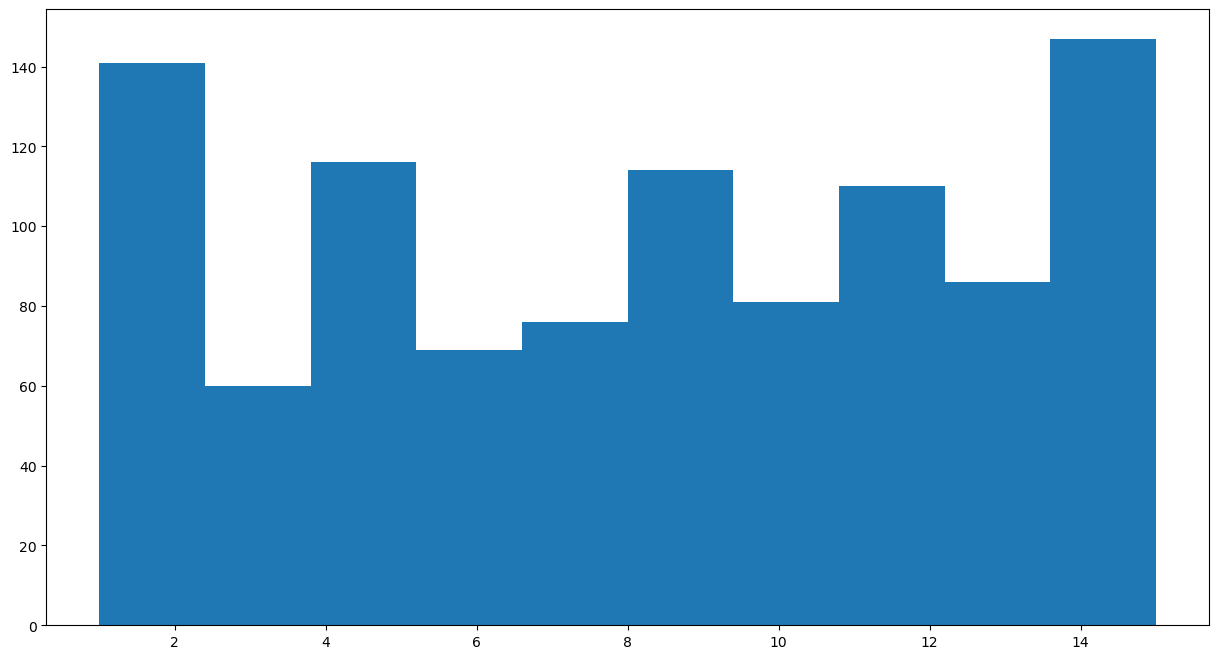

In [273]:
plt.hist(df['quantity'])
plt.show()

In [274]:
# Distplot

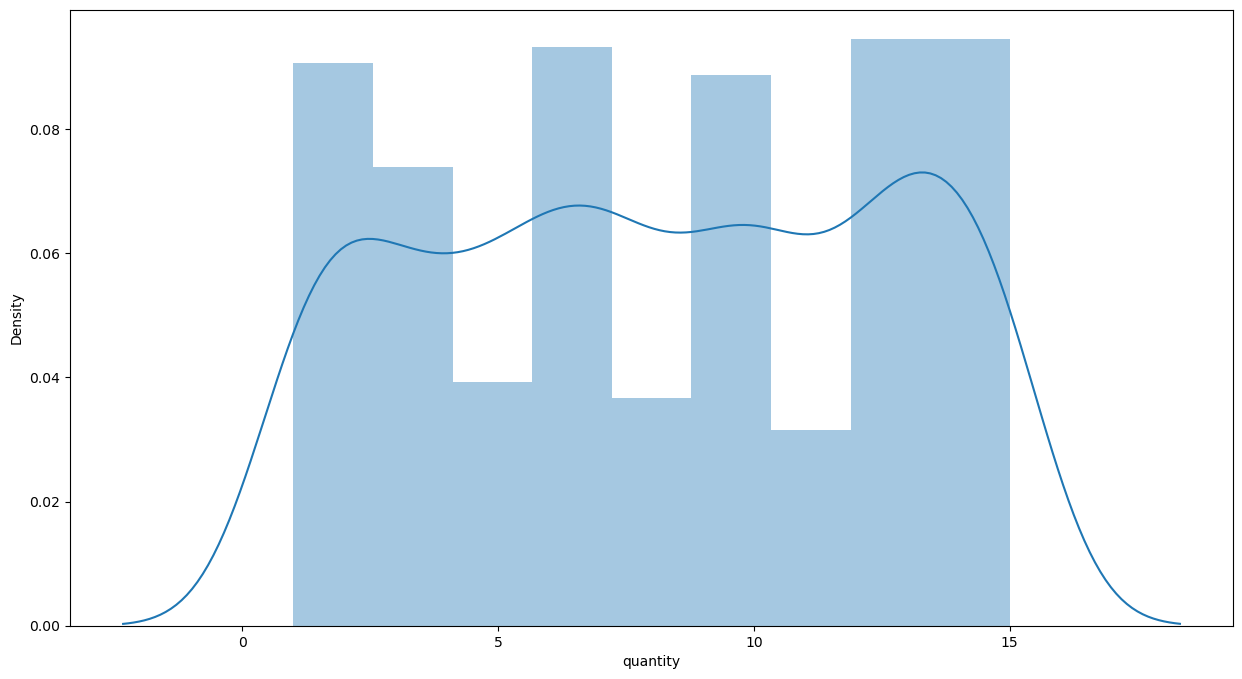

In [275]:
sns.distplot(df['quantity'],hist=1)
plt.show()

In [276]:
# kdeplot

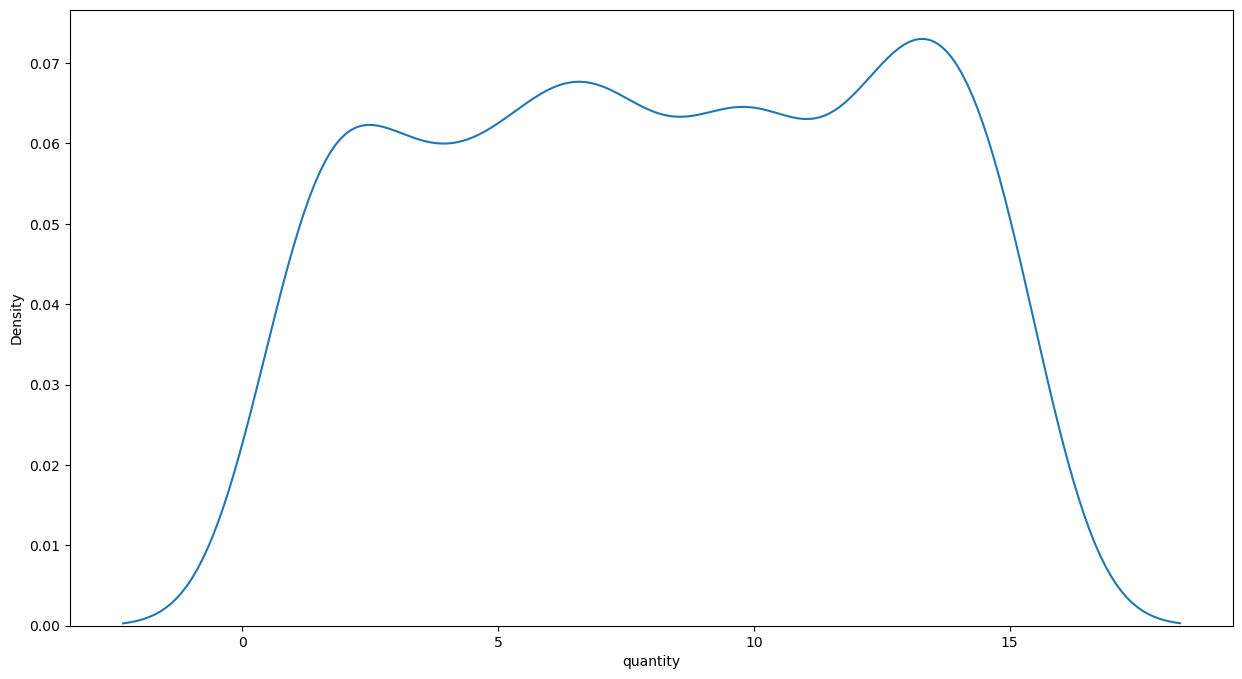

In [277]:
sns.kdeplot(df['quantity'])
plt.show()

In [278]:
# Boxplot

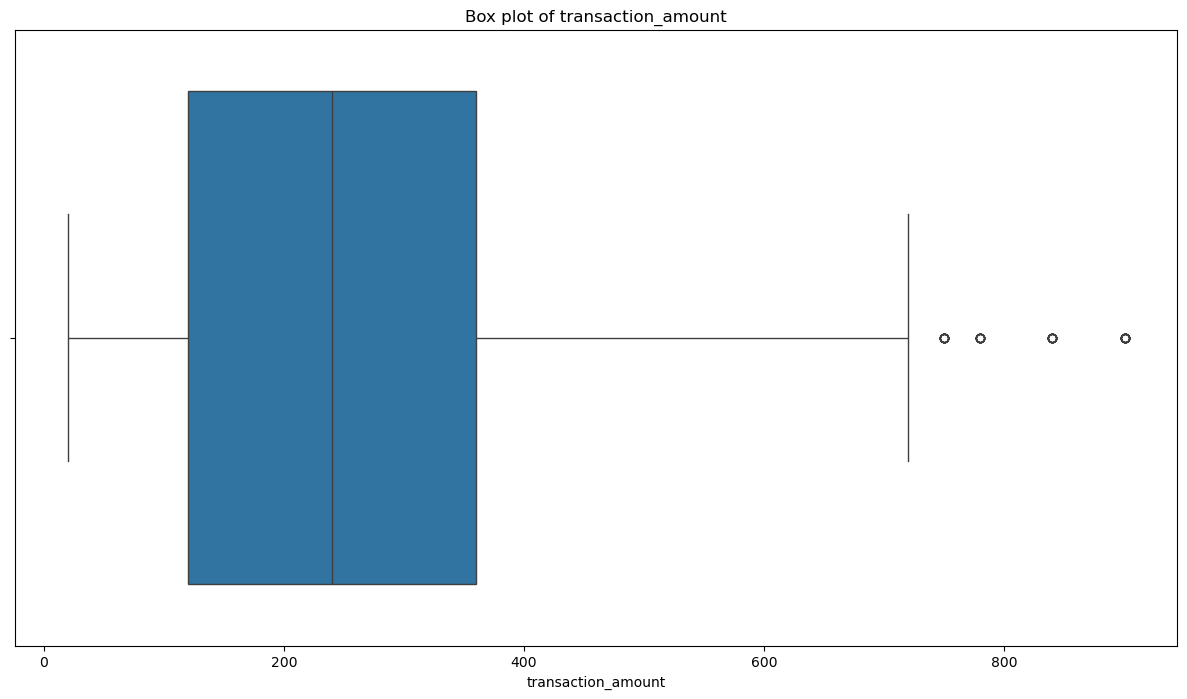

In [279]:
sns.boxplot(x=df['transaction_amount'])
plt.title('Box plot of transaction_amount')
plt.show()

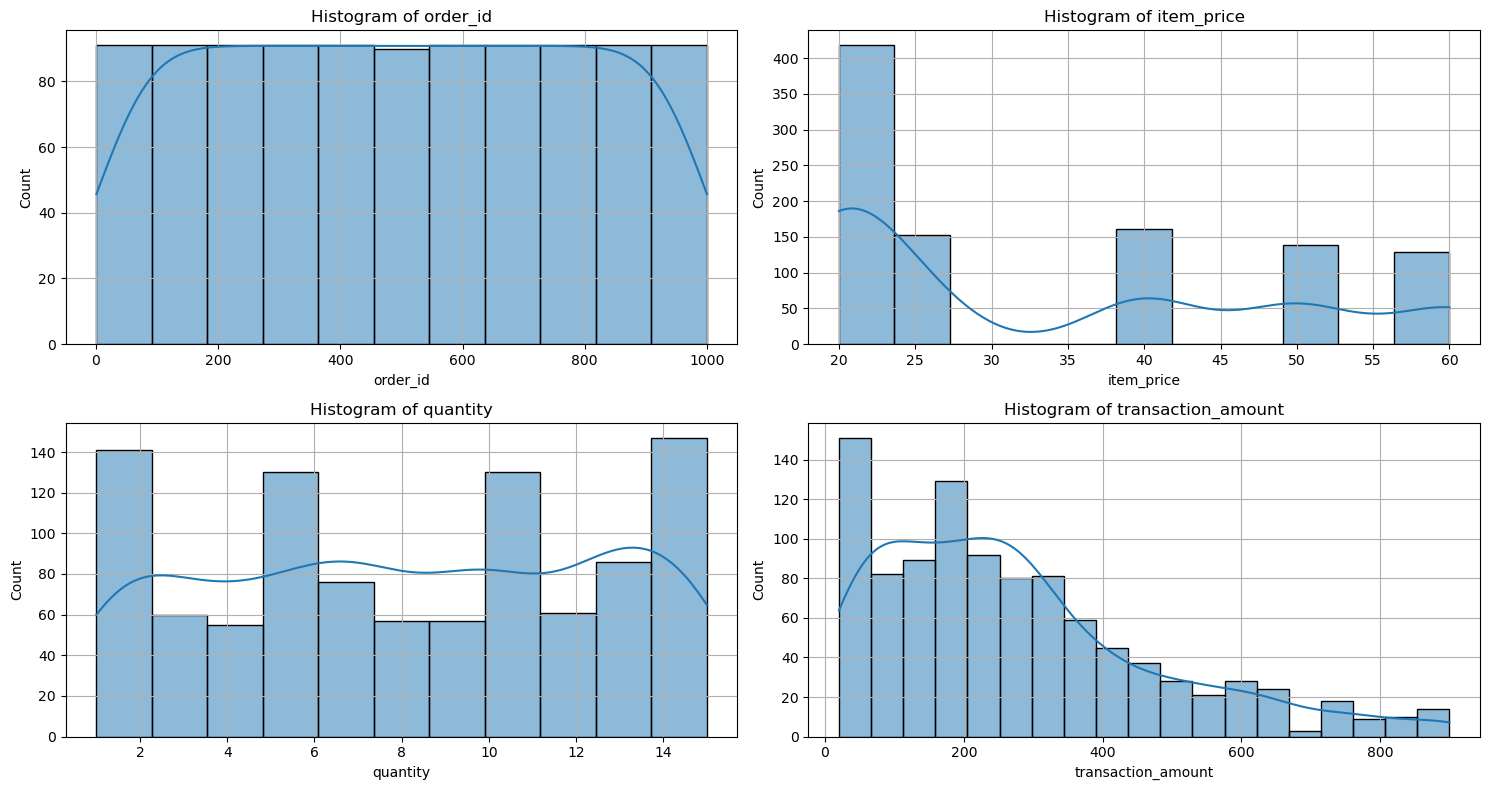

In [280]:
# subplot for histogram
t=1
for i in num:
    plt.subplot(2,2,t)
    sns.histplot(df[i],kde=1)
    plt.title(f'Histogram of {i}')
    plt.grid()
    t+=1
plt.tight_layout()
plt.show()

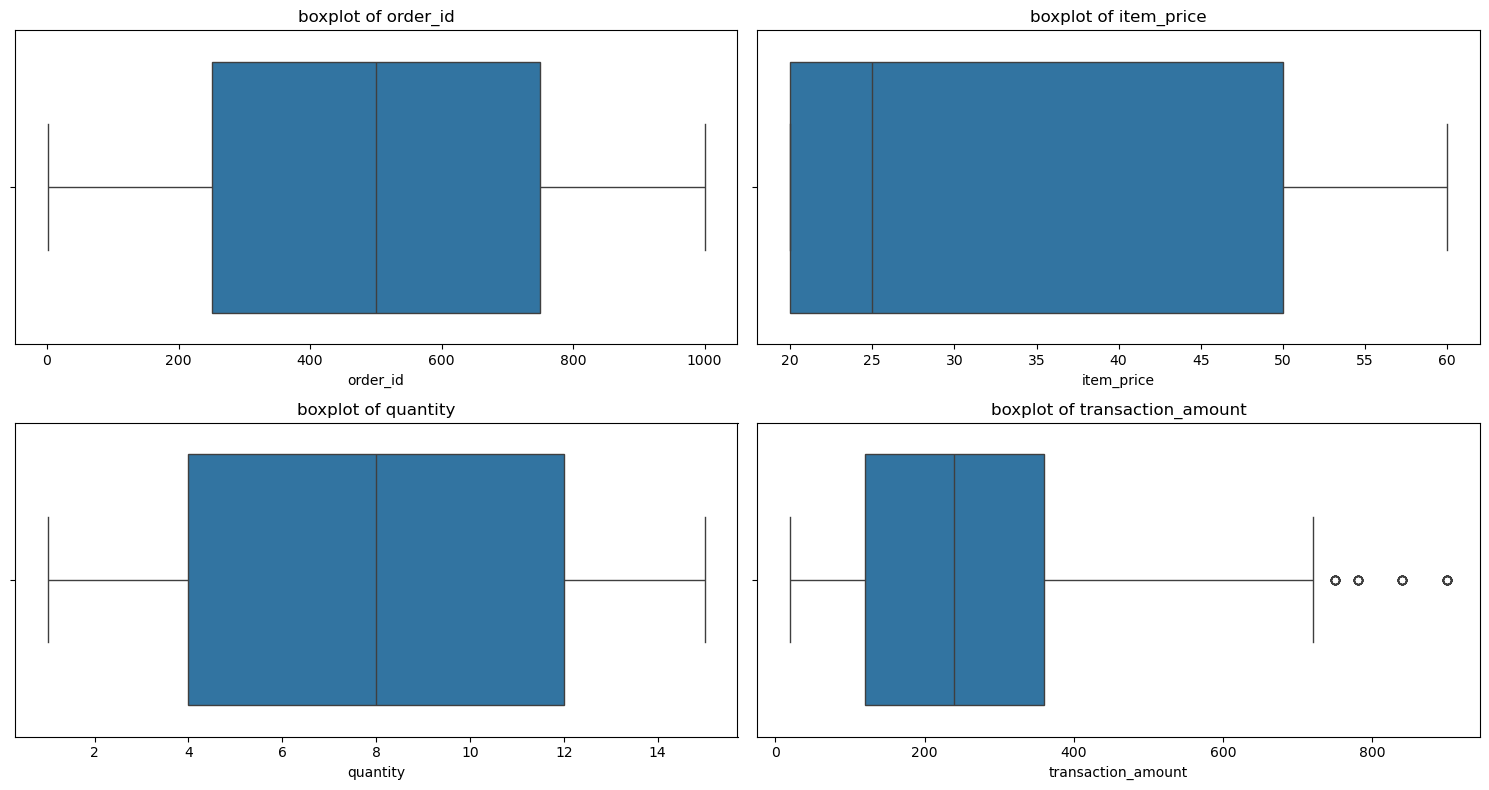

In [281]:
t=1
for i in num:
    plt.subplot(2,2,t)
    sns.boxplot(x=df[i])
    plt.title(f'boxplot of {i}')
    t+=1
plt.tight_layout()
plt.show()

# Bivariate analysis

In [283]:
# Two numeric variables

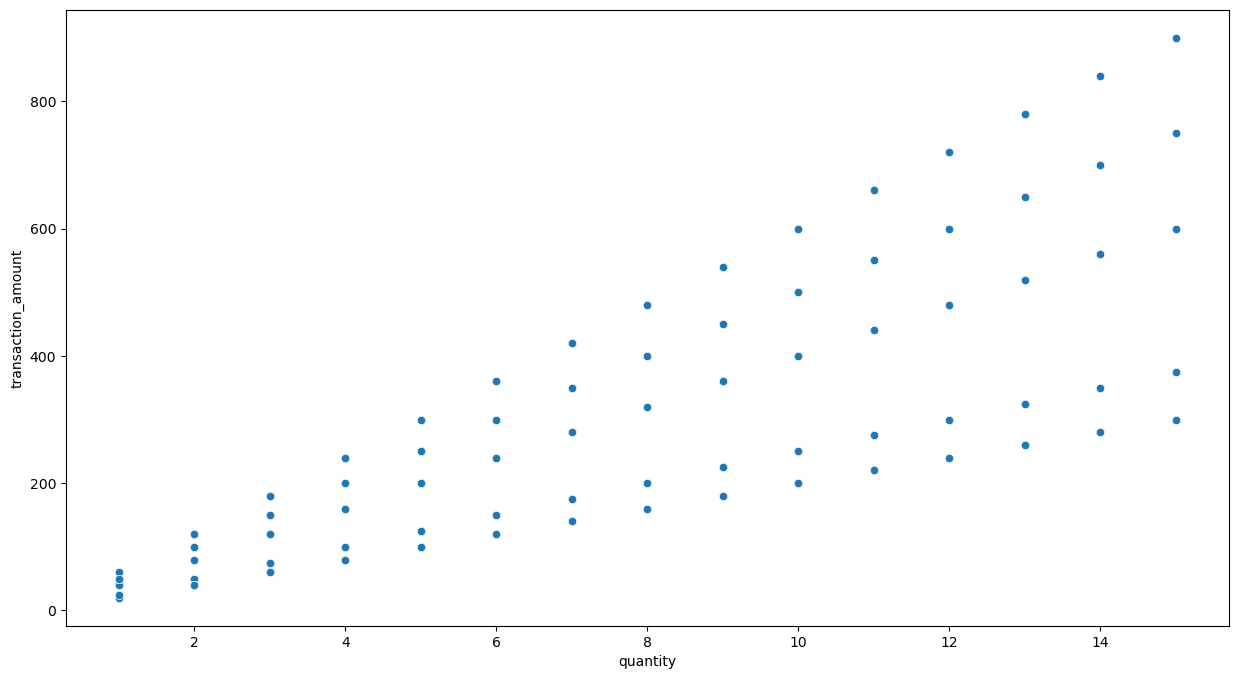

In [284]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'])
plt.show()

In [285]:
# there is an increasing trend over the plot. We can infer that there is a positive correlation

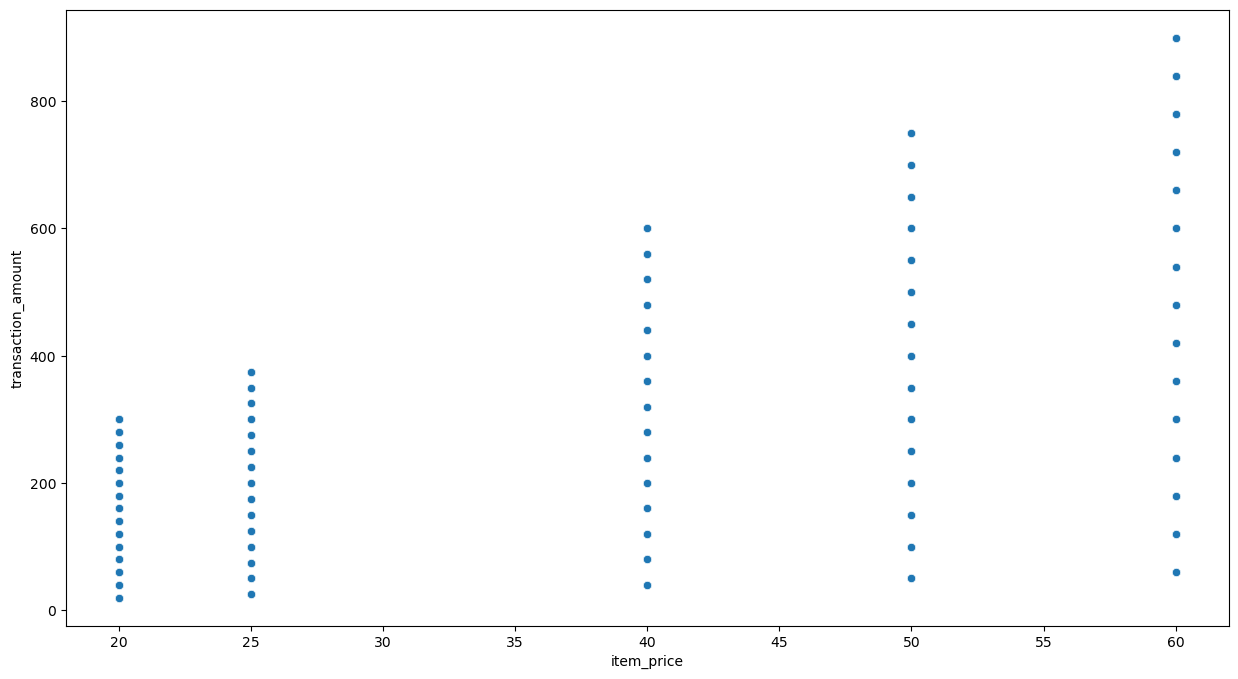

In [286]:
sns.scatterplot(x=df['item_price'],y=df['transaction_amount'])
plt.show()

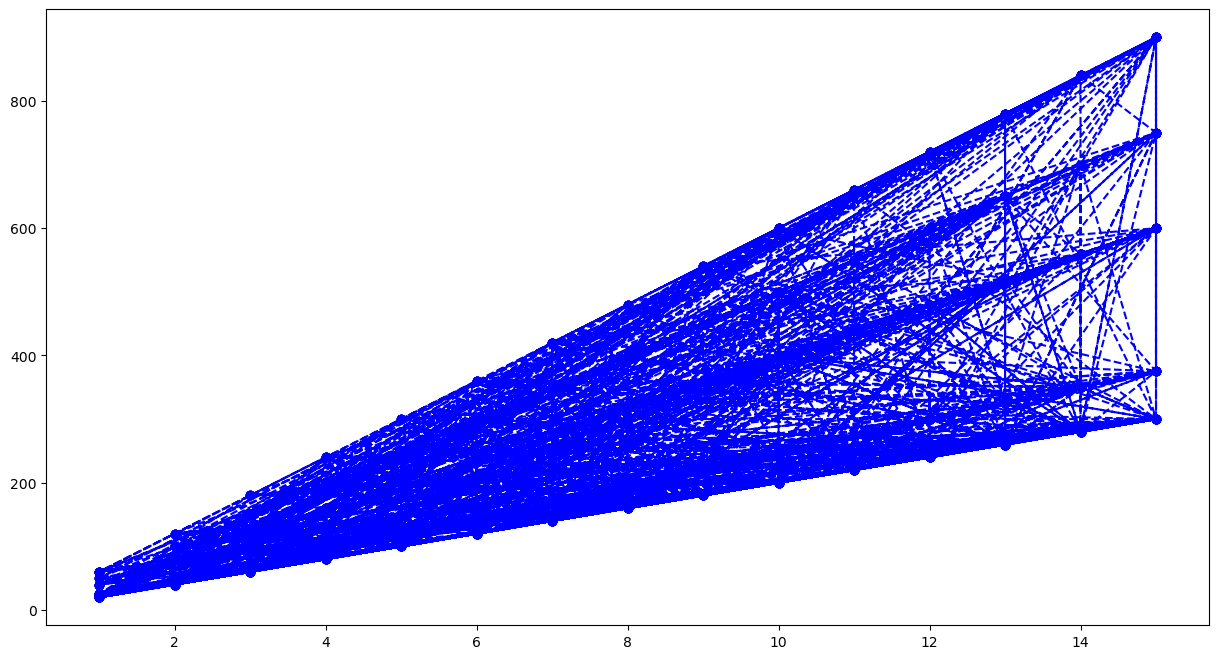

In [287]:
plt.plot(df['quantity'],df['transaction_amount'],'bo',linestyle='--')
plt.show()

# Subplot on two numeric

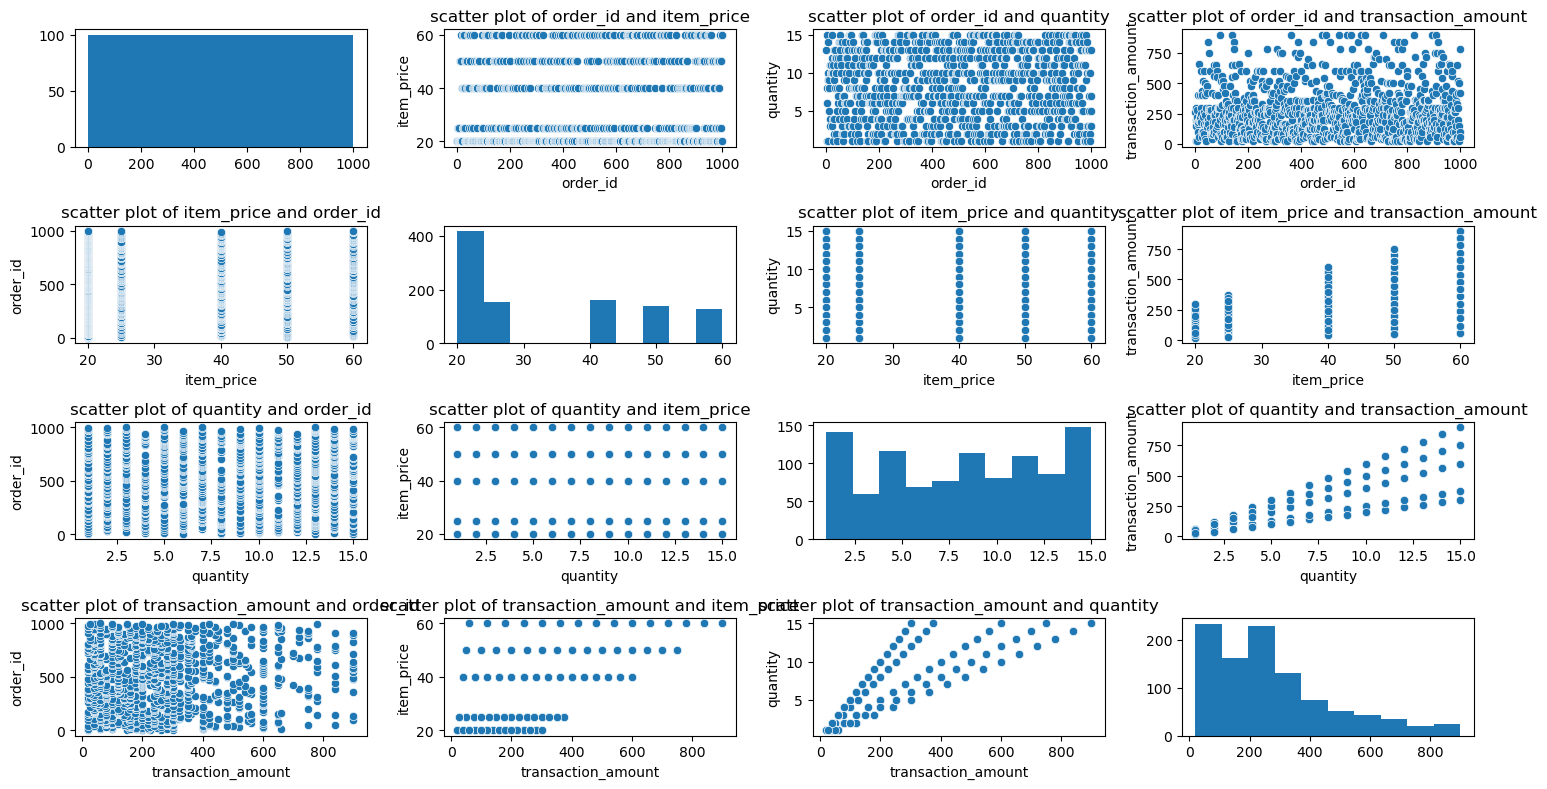

In [289]:
t=1
for i in num:
    for j in num:
        plt.subplot(4,4,t)
        if i!=j:
            sns.scatterplot(x=df[i],y=df[j])
            plt.title(f'scatter plot of {i} and {j}')
        else:
            plt.hist(df[i])
        t+=1
plt.tight_layout()
plt.show()

In [290]:
# Barplot

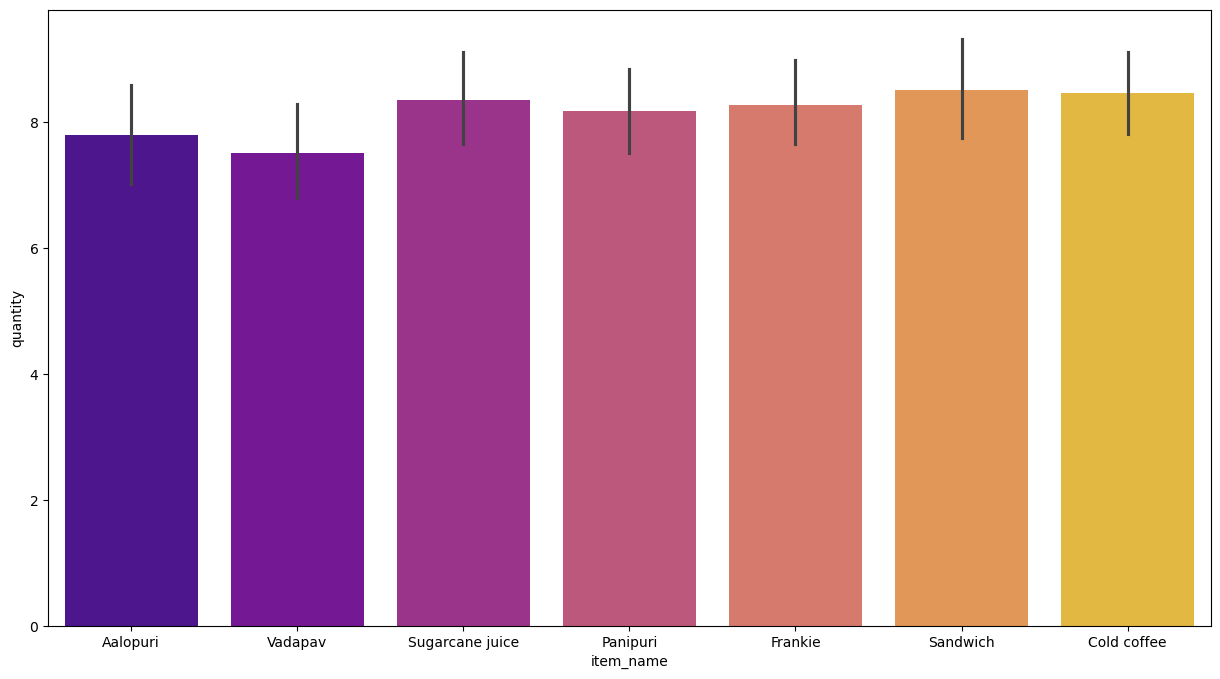

In [291]:
sns.barplot(x=df['item_name'],y=df['quantity'],palette='plasma')
plt.show()

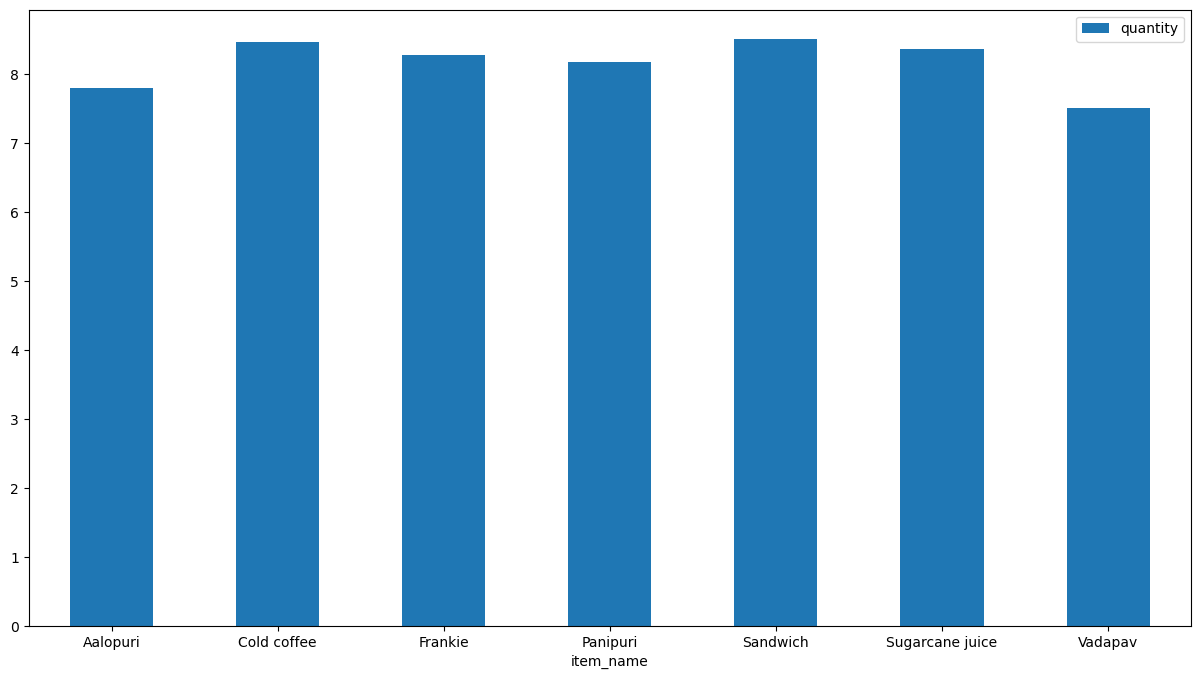

In [292]:
df.groupby(by='item_name')[['quantity']].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [293]:
#boxplot

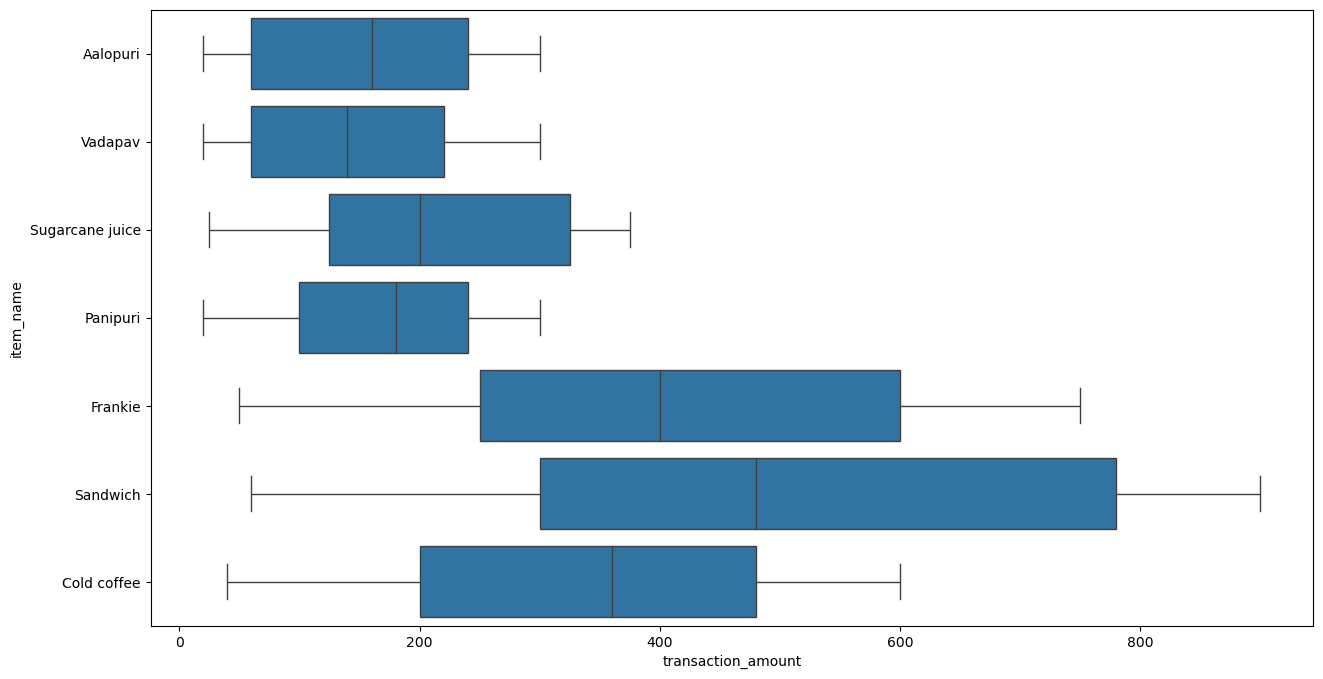

In [294]:
sns.boxplot(x=df['transaction_amount'],y=df['item_name'])
plt.show()

In [295]:
# Subplot on num and cat

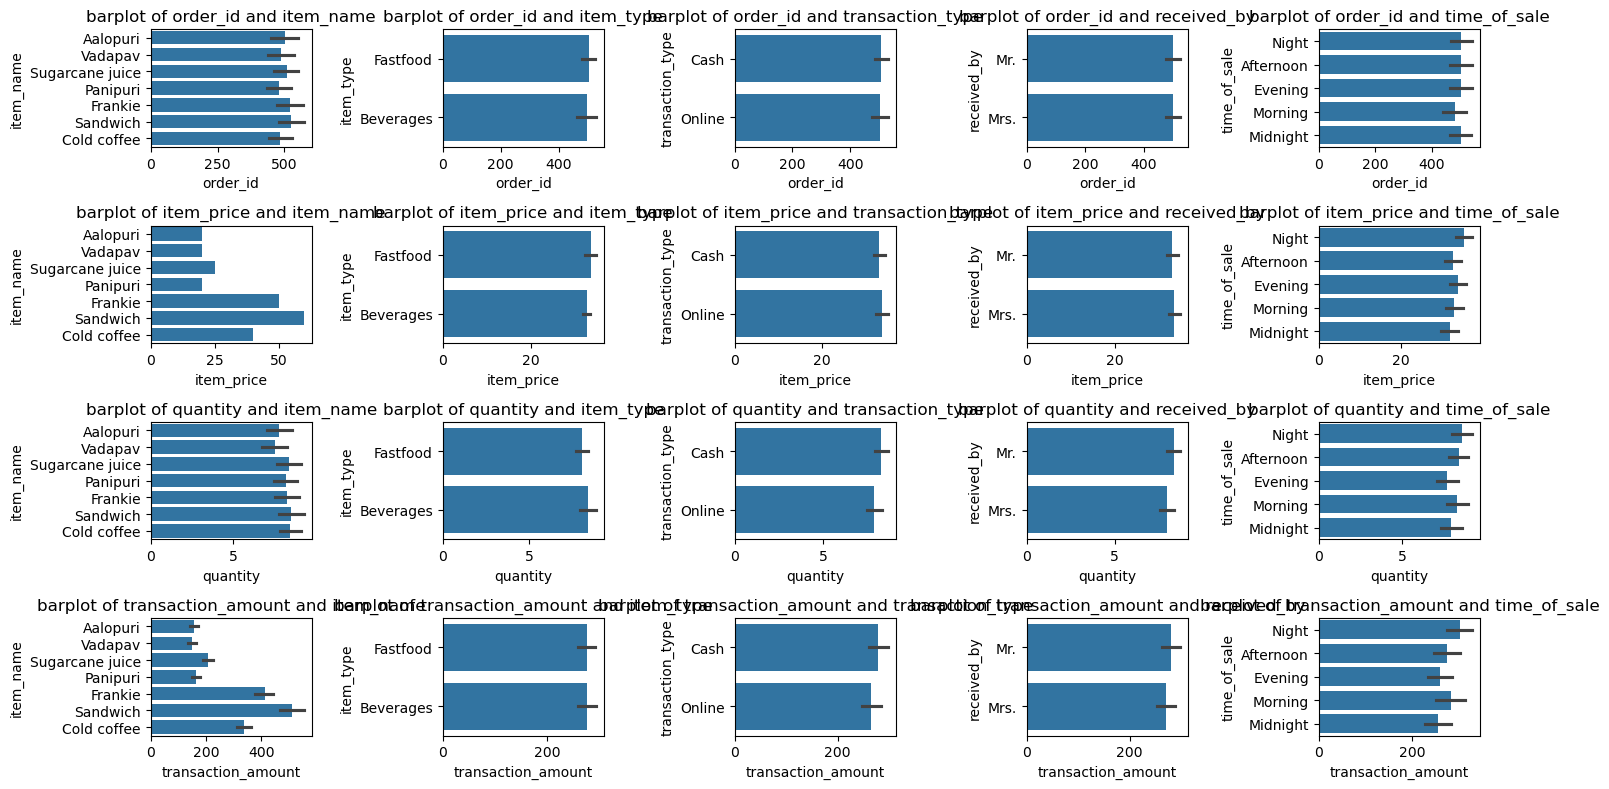

In [296]:
t=1
for i in num:
    for j in cat:
        plt.subplot(4,5,t)
        sns.barplot(x=df[i],y=df[j])
        plt.title(f'barplot of {i} and {j}')
        t+=1
plt.tight_layout()
plt.show()

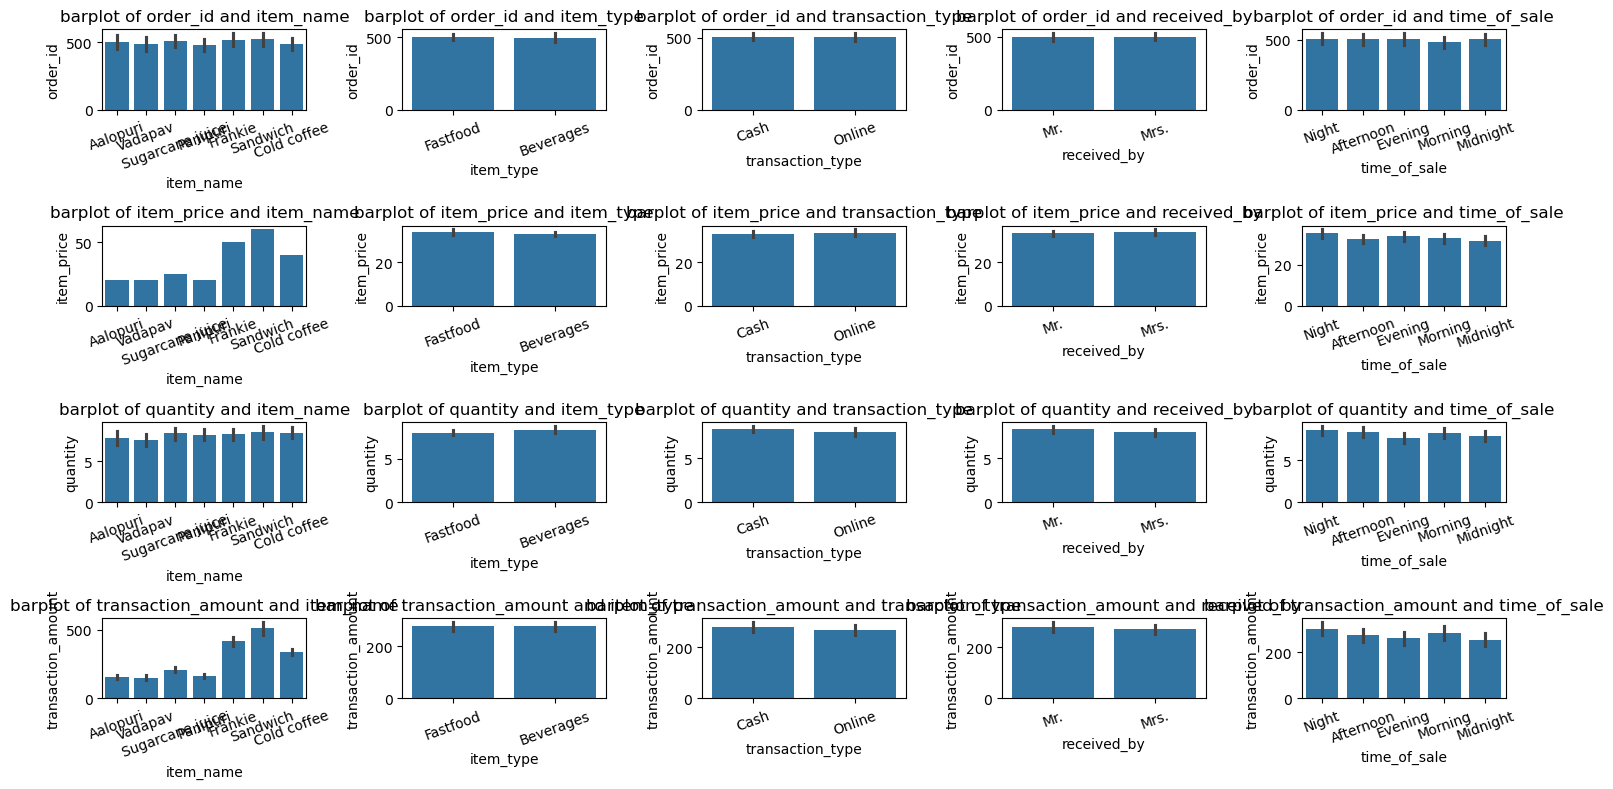

In [297]:
t=1
for i in num:
    for j in cat:
        plt.subplot(4,5,t)
        sns.barplot(y=df[i],x=df[j]) # its better to use categoric on y
        plt.xticks(rotation =20)
        plt.title(f'barplot of {i} and {j}')
        t+=1
plt.tight_layout()
plt.show()

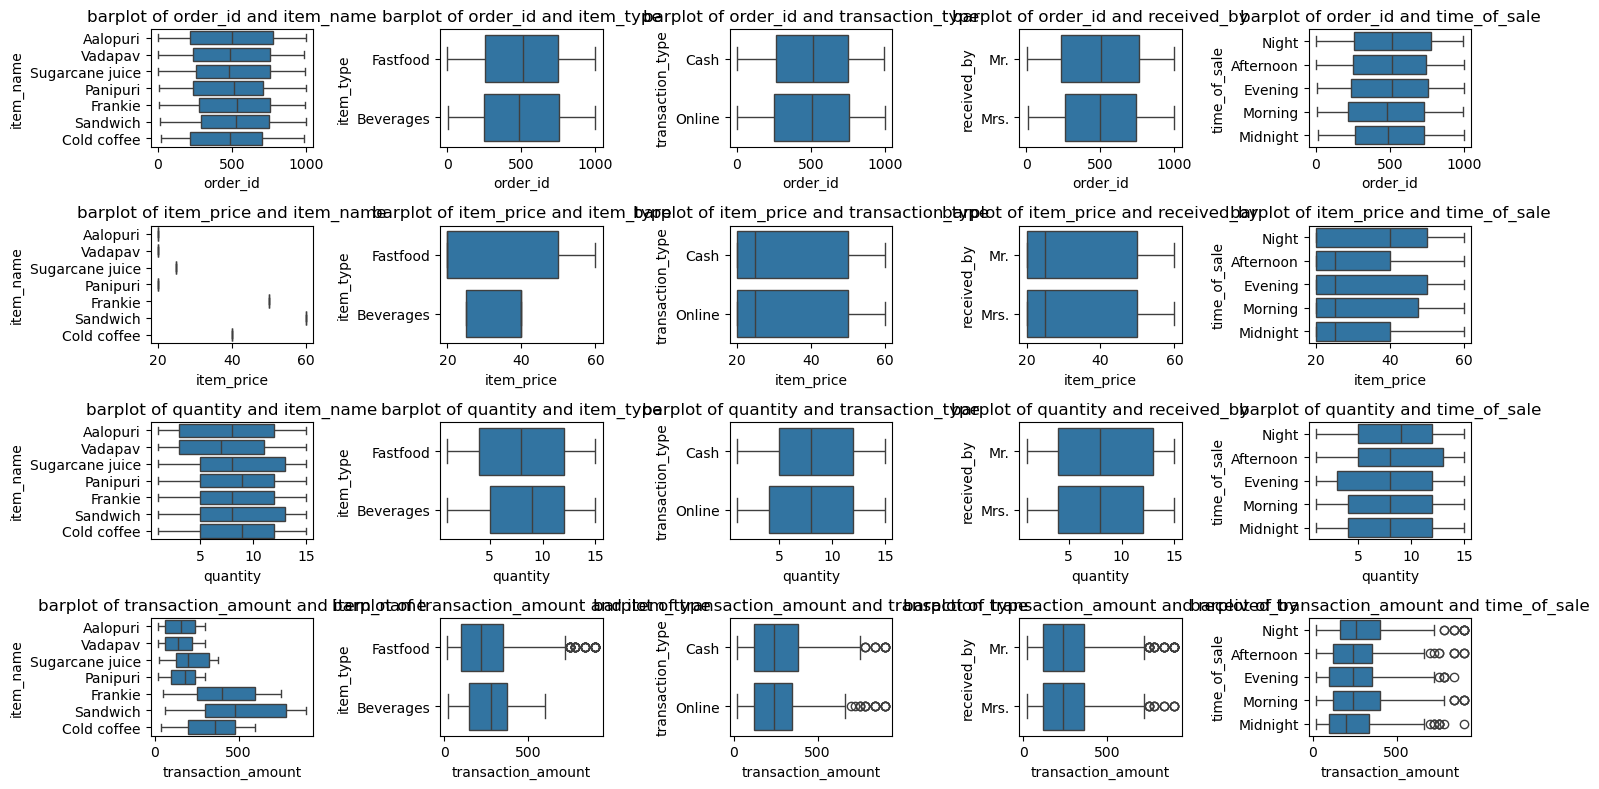

In [298]:
t=1
for i in num:
    for j in cat:
        plt.subplot(4,5,t)
        sns.boxplot(x=df[i],y=df[j])
        plt.title(f'barplot of {i} and {j}')
        t+=1
plt.tight_layout()
plt.show()

In [299]:
# cat vs cat

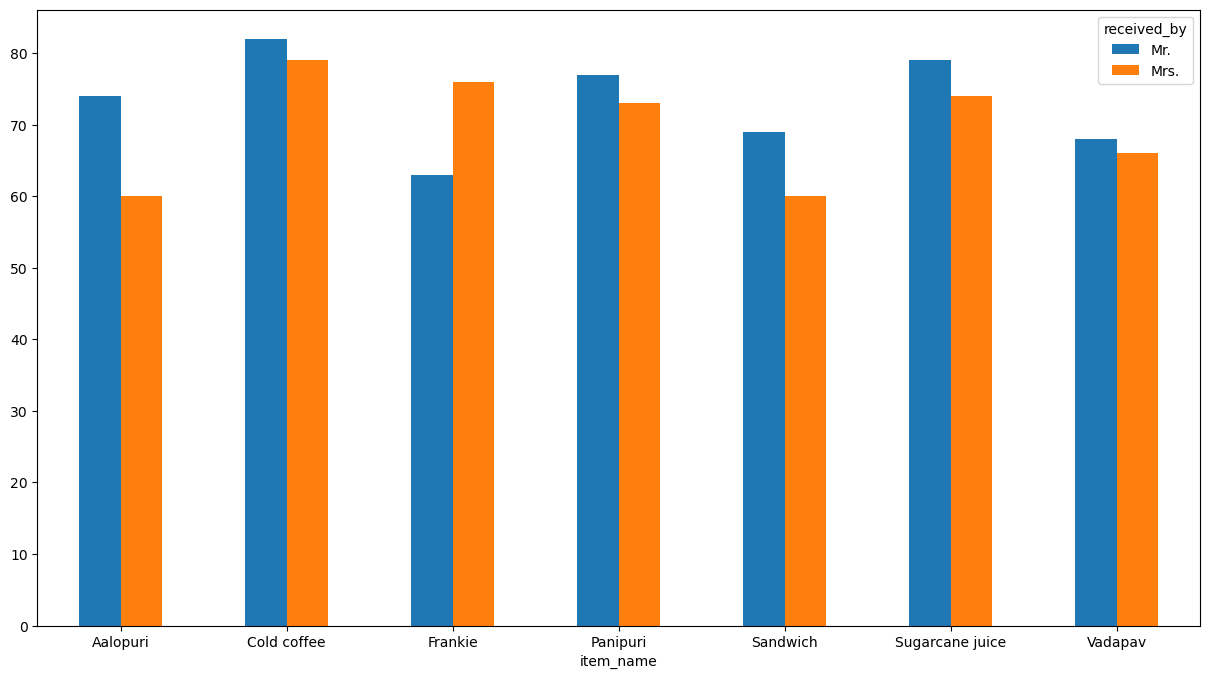

In [300]:
pd.crosstab(df['item_name'],df['received_by']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [301]:
# countplot

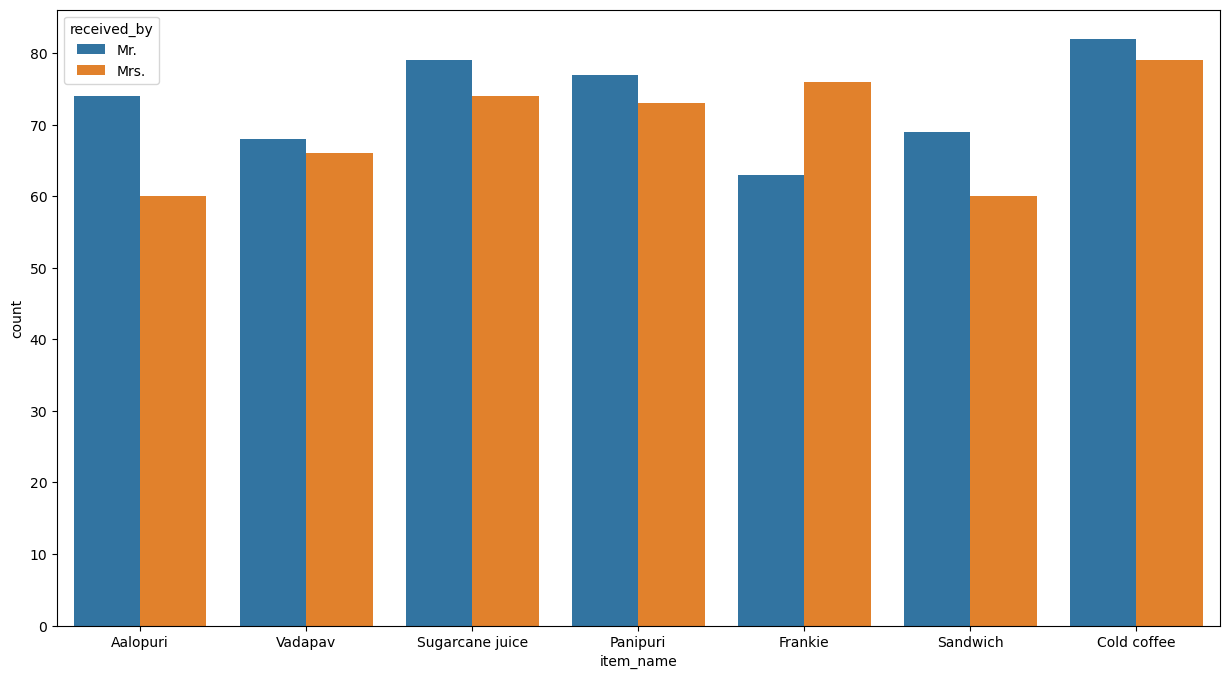

In [302]:
sns.countplot(x=df['item_name'],hue=df['received_by'])
plt.show()

In [303]:
# subplot of two categoric

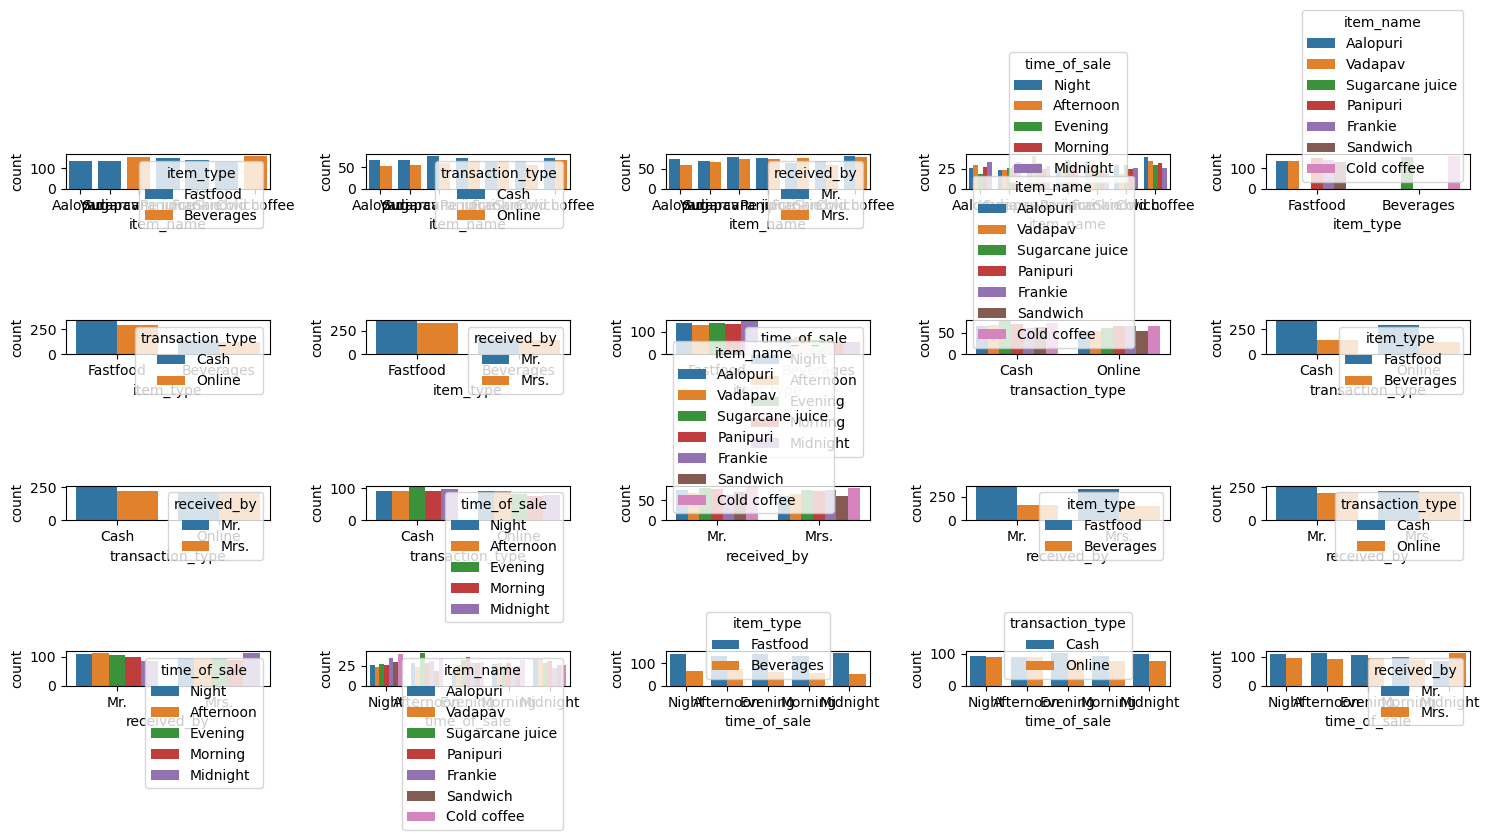

In [304]:
t=1
for i in cat:
    for j in cat:
        if i!=j:
            plt.subplot(5,5,t)
            sns.countplot(x=df[i],hue=df[j])
            t+=1
plt.tight_layout()
plt.show()

In [305]:
# NUM vs NUM vs CAT

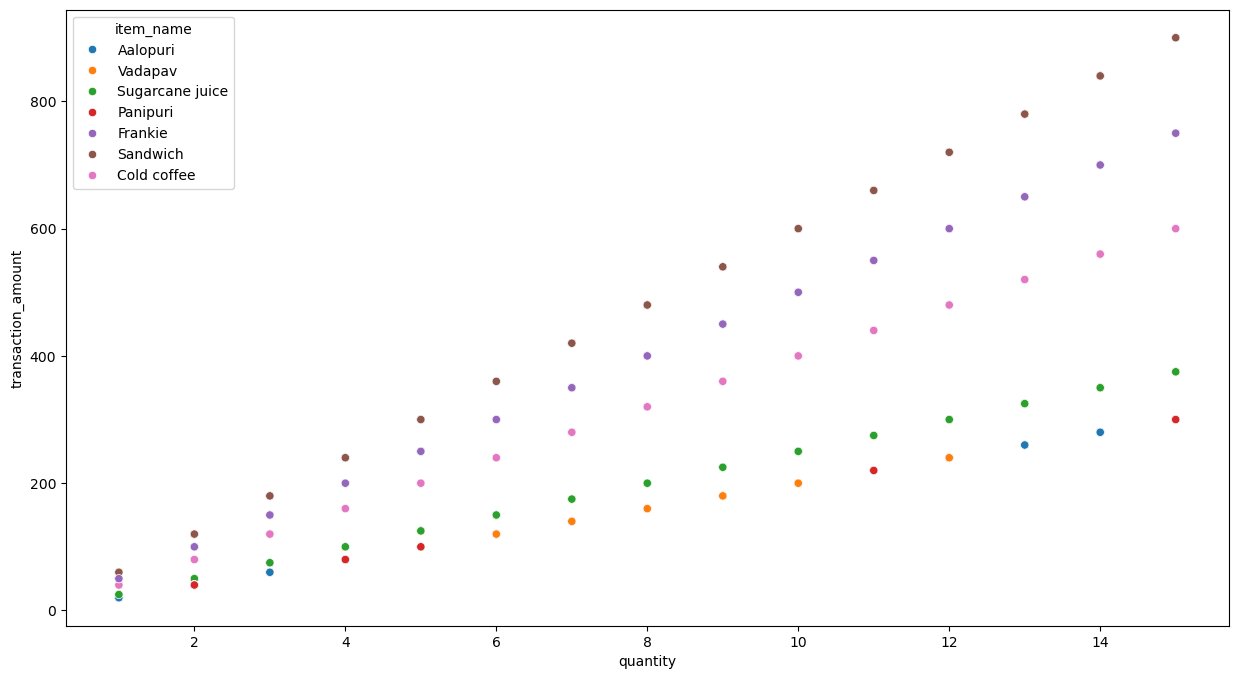

In [306]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'],hue=df['item_name'])
plt.show()

In [307]:
# NUM vs CAT vs CAT

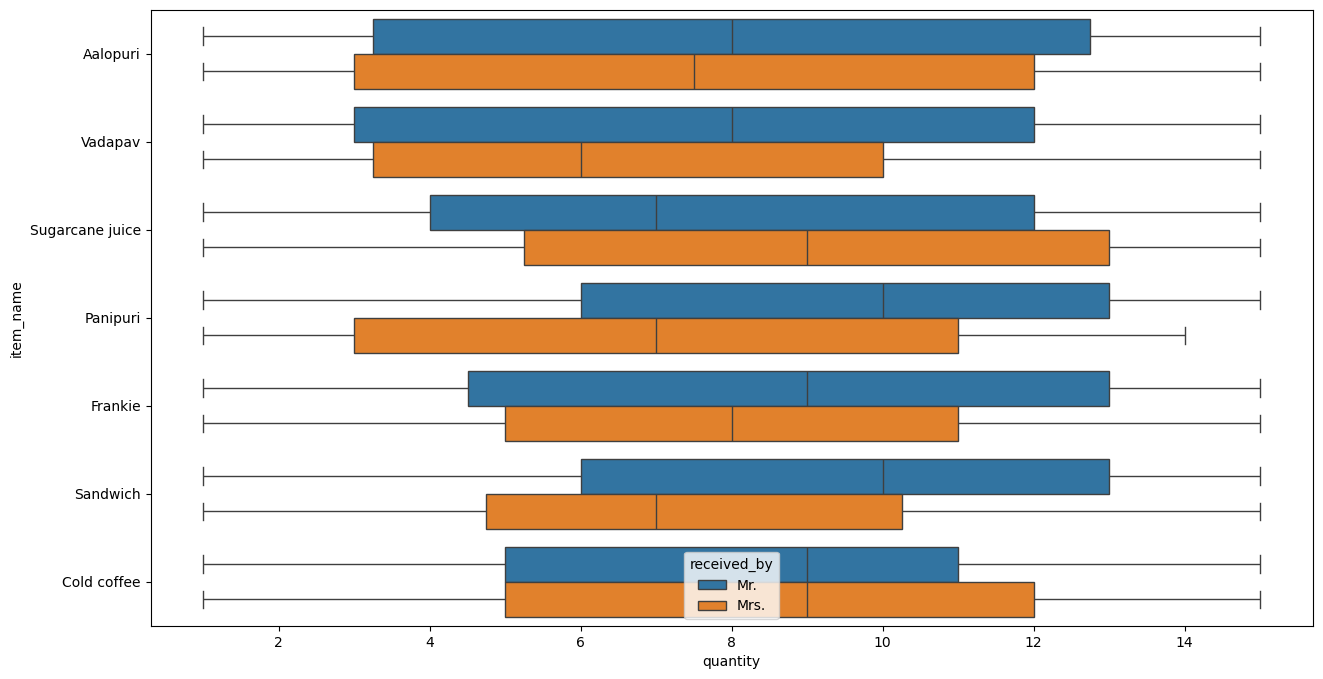

In [308]:
sns.boxplot(x=df['quantity'],y=df['item_name'],hue=df['received_by'])
plt.show()

In [309]:
# Heat map

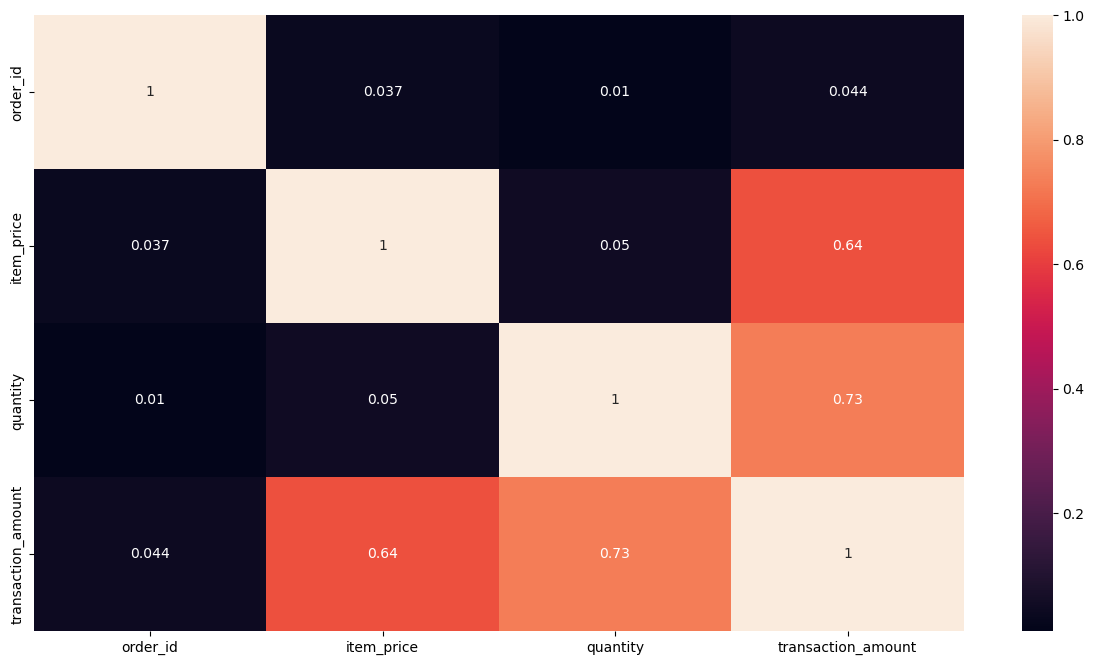

In [310]:
sns.heatmap(df[num].corr(),annot=True)
plt.show()

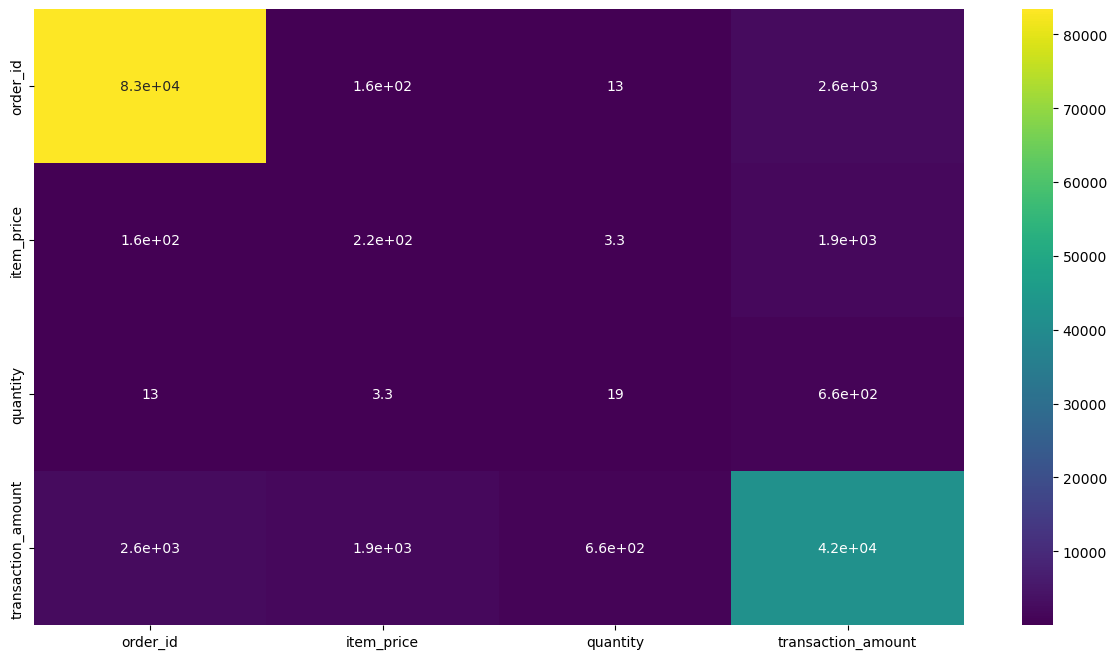

In [311]:
sns.heatmap(df[num].cov(),annot=True,cmap='viridis')
plt.show()

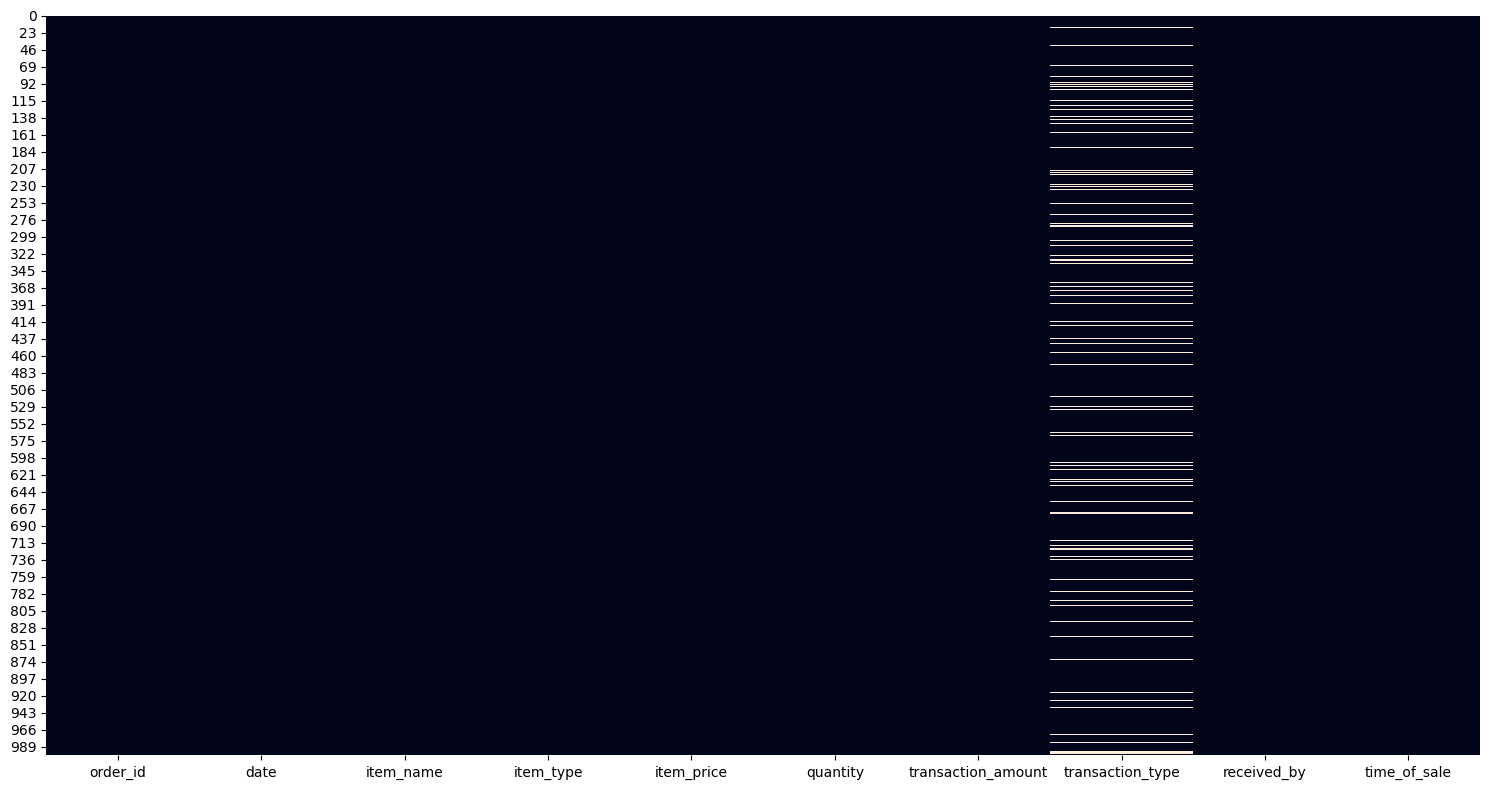

In [312]:
# for null values
sns.heatmap(df.isnull(),cbar=False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [313]:
# pairplot

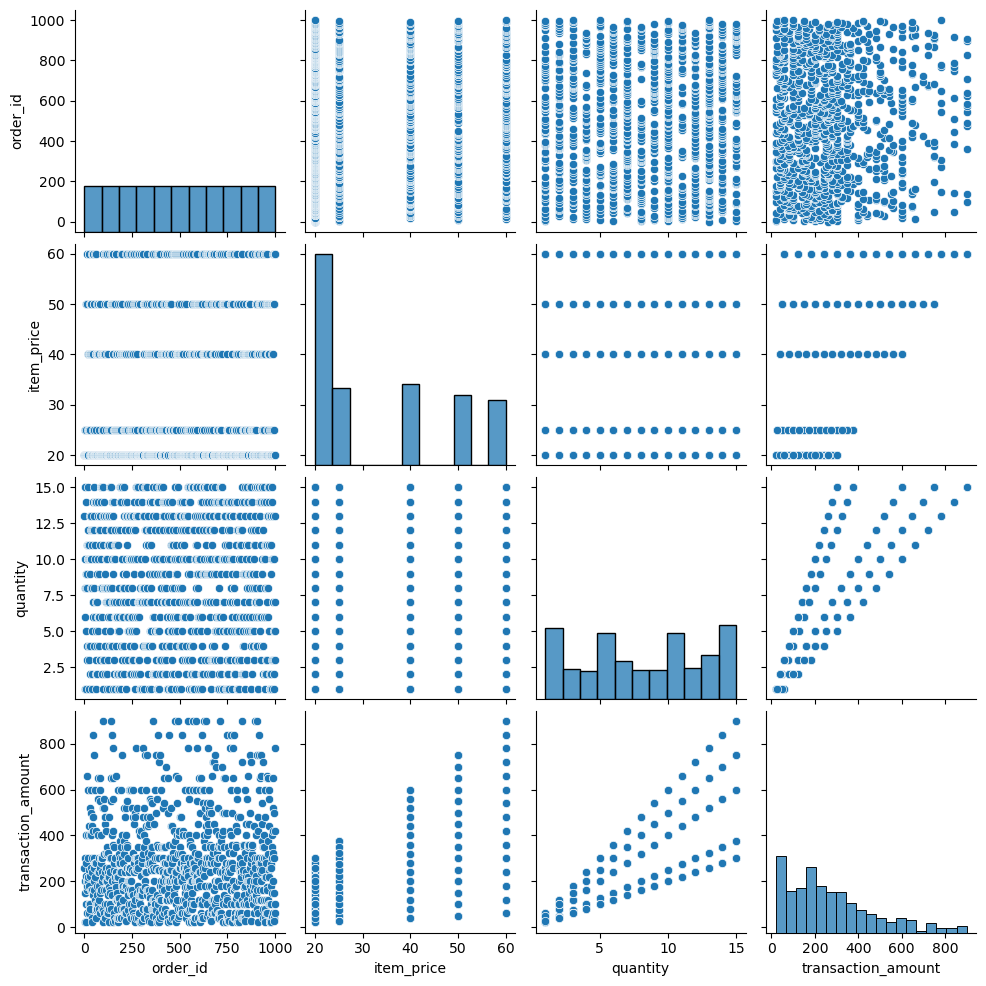

In [314]:
sns.pairplot(df)
plt.show()

# Other visualisations

In [316]:
# lineplot

In [317]:
x = np.linspace(1,20,100)

In [318]:
y = np.log(x)

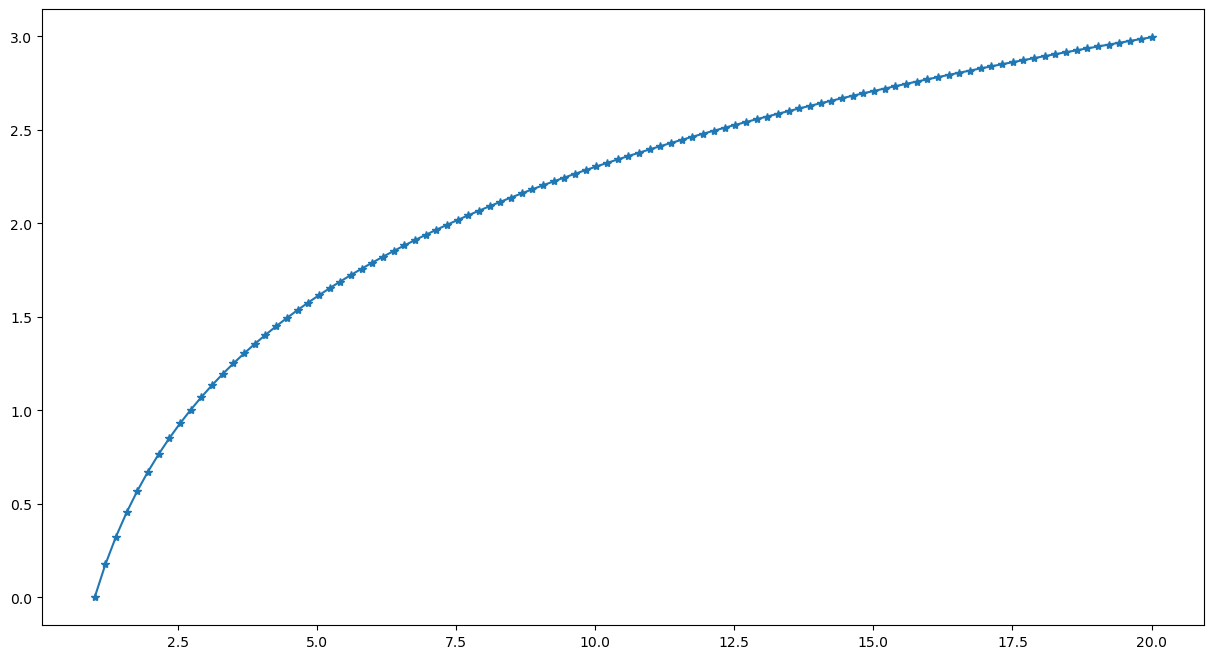

In [319]:
plt.plot(x,y,marker='*')
plt.show()

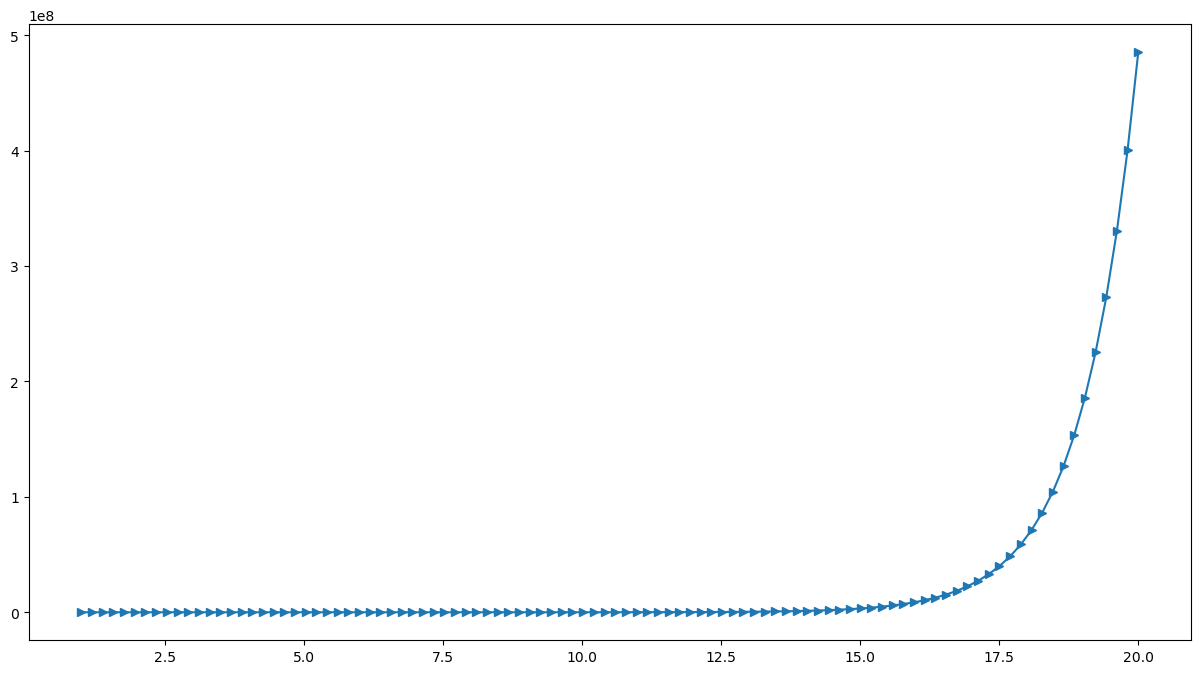

In [320]:
z=np.exp(x)
plt.plot(x,z,marker='>')
plt.show()

In [321]:
# violin plot

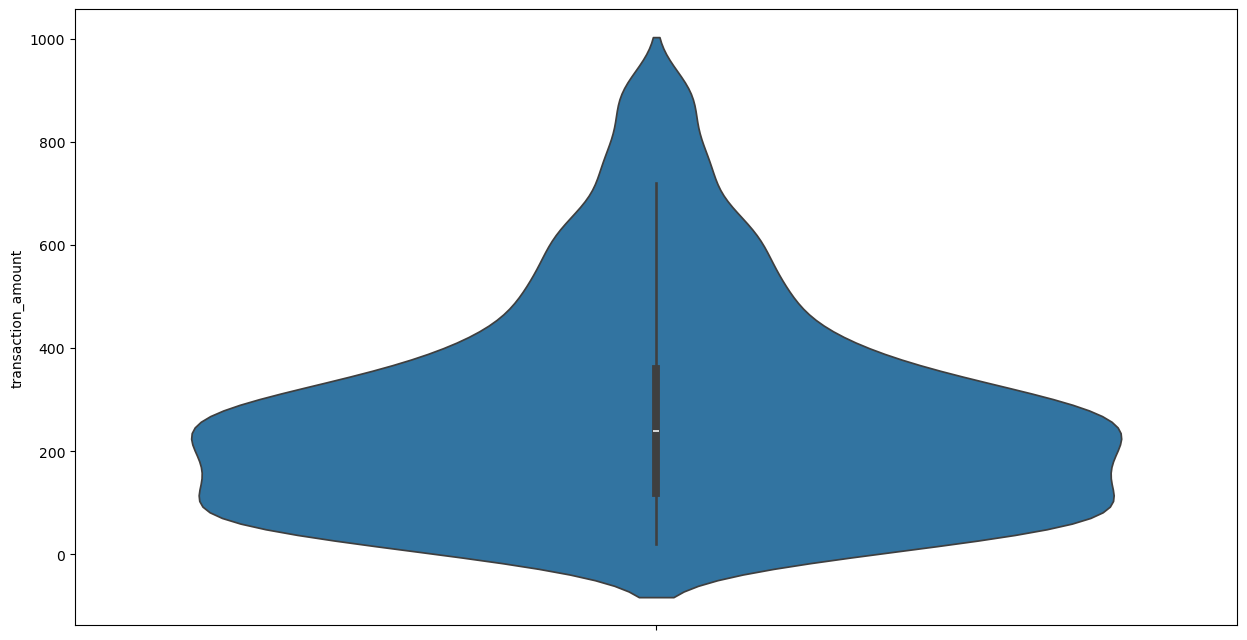

In [322]:
sns.violinplot(df['transaction_amount'])
plt.show()

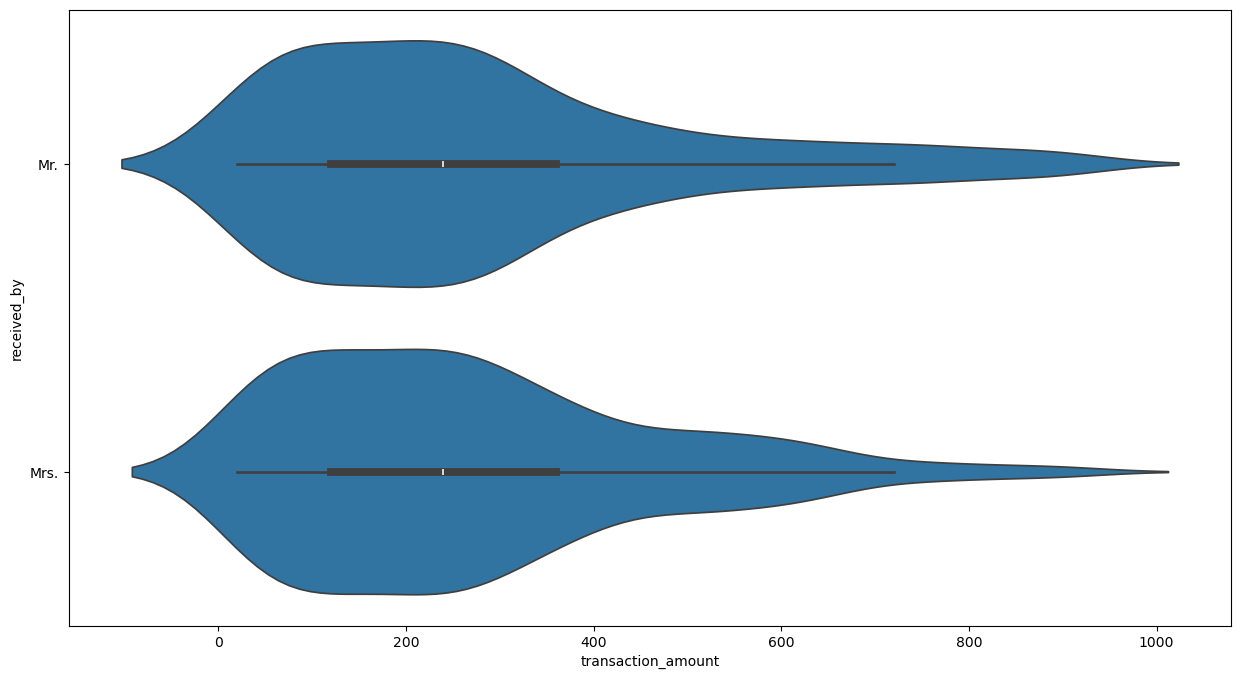

In [323]:
sns.violinplot(x=df['transaction_amount'],y=df['received_by'])
plt.show()

In [324]:
# Swarmplot

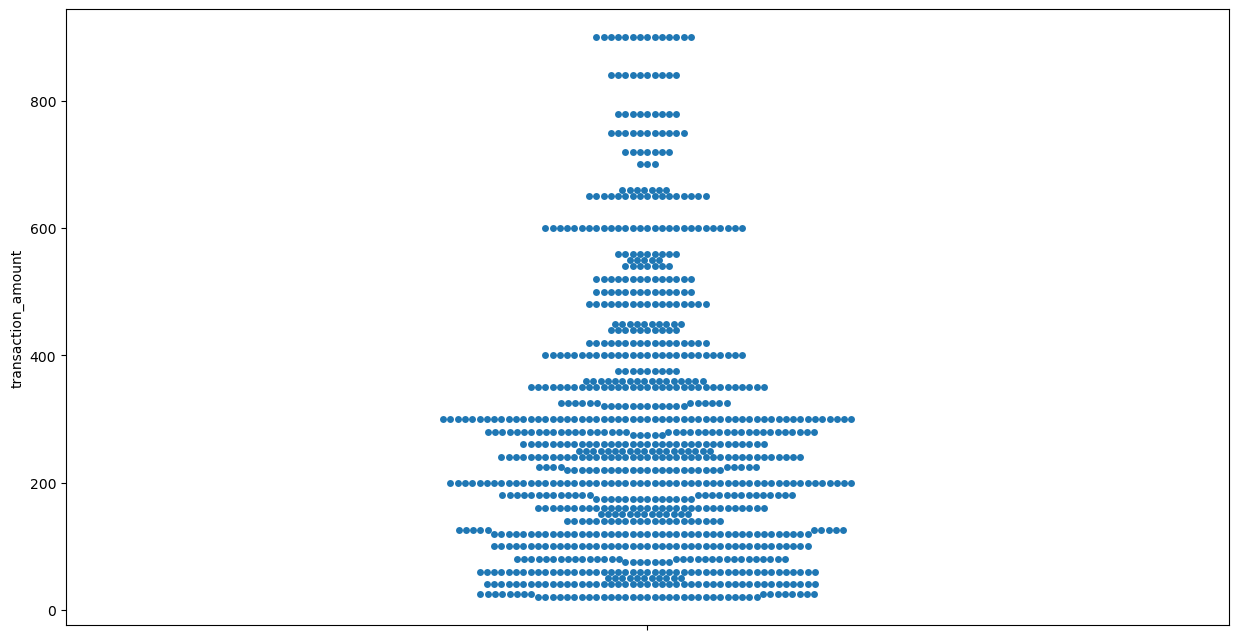

In [325]:
sns.swarmplot(df['transaction_amount'])
plt.show()

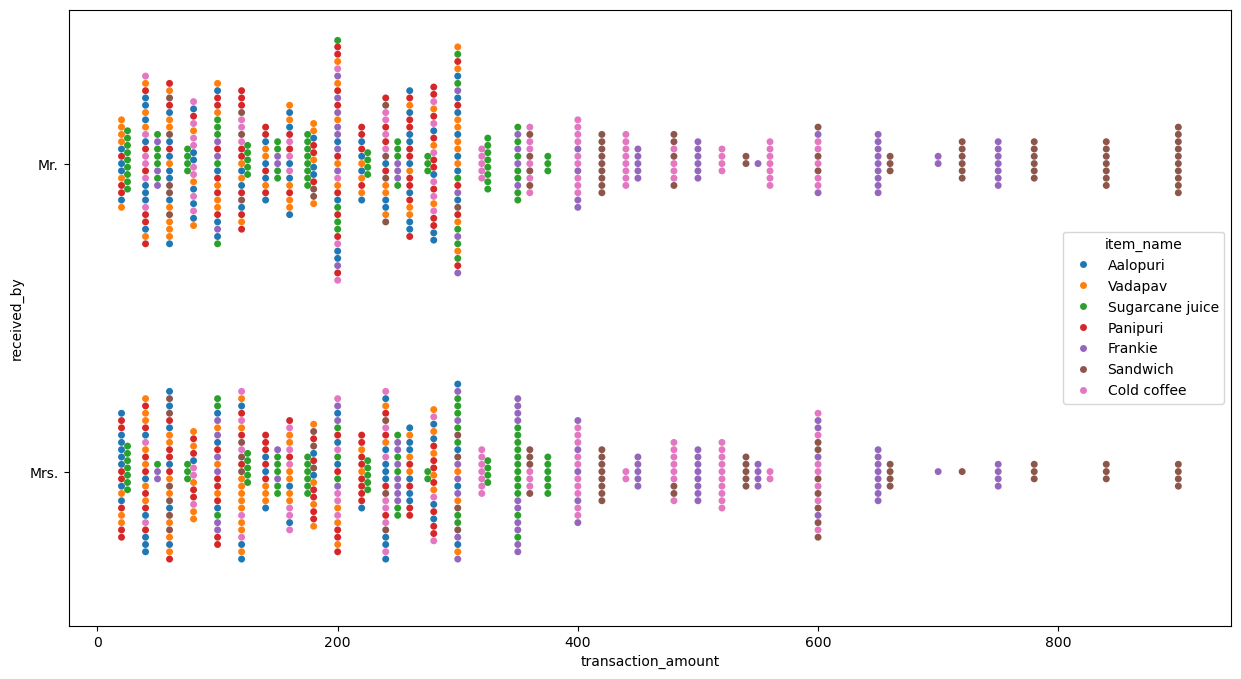

In [326]:
sns.swarmplot(x=df['transaction_amount'],y=df['received_by'],hue=df['item_name'])
plt.show()

In [327]:
# regression plot

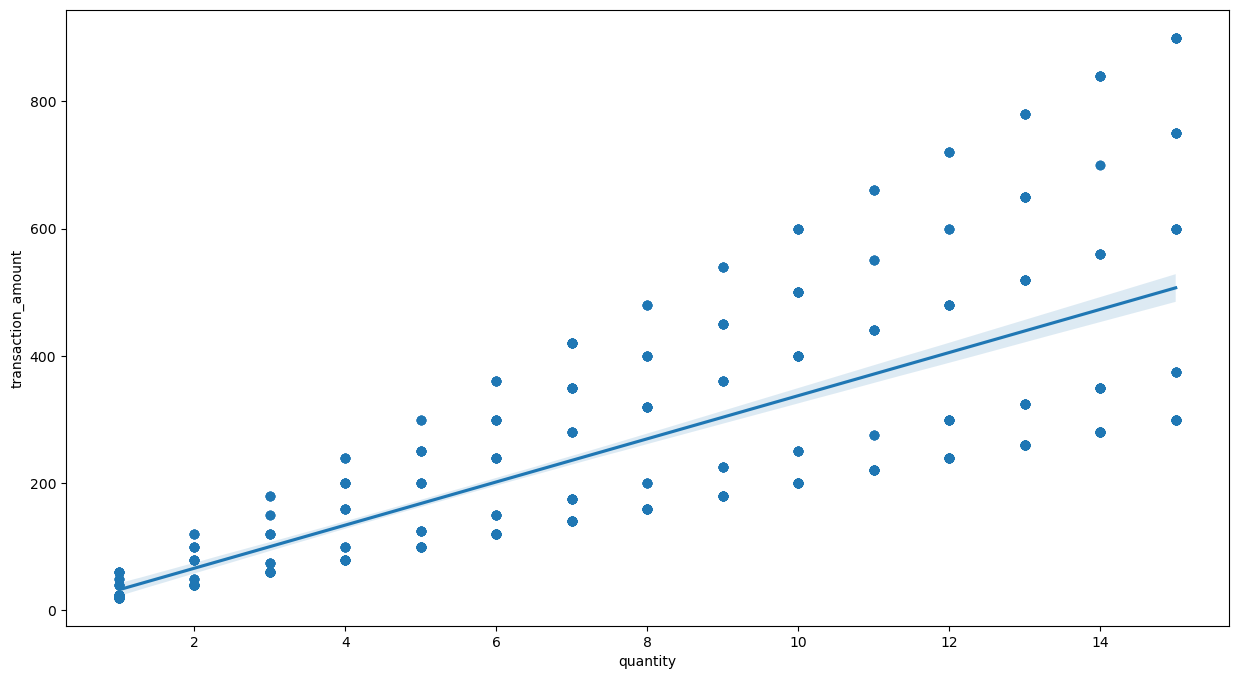

In [328]:
sns.regplot(x=df['quantity'],y=df['transaction_amount'])
plt.show()

In [329]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [330]:
df['transaction_type'].unique()

array([nan, 'Cash', 'Online'], dtype=object)

In [331]:
df['transaction_type'].isna().sum()

107

In [332]:
df['transaction_type']=df['transaction_type'].replace('nan',np.nan)

In [497]:
df['transaction_type']=df['transaction_type'].fillna(df['transaction_type'].mode()[0])

In [499]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [335]:
df.duplicated().sum()

0

In [ ]:
#inference : there is no duplicated values

#### outliers

In [504]:
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

In [512]:
def cap_outliers(df): 
    numeric_cols = df.select_dtypes(include=[np.number]).columns 
    for col in numeric_cols: 
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col]) 
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col]) 
    return df

In [514]:
df_capped = cap_outliers(df)

In [516]:
print("Original DataFrame:") 
print(df) 
print("\nDataFrame after capping outliers:") 
print(df_capped)

Original DataFrame:
     order_id       date        item_name  item_type  item_price  quantity  \
0         1.0 2022-07-03         Aalopuri   Fastfood        20.0      13.0   
1         2.0 2022-08-23          Vadapav   Fastfood        20.0      15.0   
2         3.0 2022-11-20          Vadapav   Fastfood        20.0       1.0   
3         4.0 2023-02-03  Sugarcane juice  Beverages        25.0       6.0   
4         5.0 2022-10-02  Sugarcane juice  Beverages        25.0       8.0   
..        ...        ...              ...        ...         ...       ...   
995     996.0 2023-03-19          Frankie   Fastfood        50.0      10.0   
996     997.0 2022-09-20         Sandwich   Fastfood        60.0       7.0   
997     998.0 2023-01-26         Sandwich   Fastfood        60.0      13.0   
998     999.0 2022-08-27         Panipuri   Fastfood        20.0       5.0   
999    1000.0 2022-05-29         Aalopuri   Fastfood        20.0       3.0   

     transaction_amount transaction_type re

In [518]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1.0,2022-07-03,Aalopuri,Fastfood,20.0,13.0,260.0,Cash,Mr.,Night
1,2.0,2022-08-23,Vadapav,Fastfood,20.0,15.0,300.0,Cash,Mr.,Afternoon
2,3.0,2022-11-20,Vadapav,Fastfood,20.0,1.0,20.0,Cash,Mr.,Afternoon
3,4.0,2023-02-03,Sugarcane juice,Beverages,25.0,6.0,150.0,Online,Mr.,Night
4,5.0,2022-10-02,Sugarcane juice,Beverages,25.0,8.0,200.0,Online,Mr.,Evening


### encodings

In [523]:
cat

['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']

In [529]:
for i in cat:
    print(i)
    print(df[i].unique())
    print(' ')

item_name
['Aalopuri' 'Vadapav' 'Sugarcane juice' 'Panipuri' 'Frankie' 'Sandwich'
 'Cold coffee']
 
item_type
['Fastfood' 'Beverages']
 
transaction_type
['Cash' 'Online']
 
received_by
['Mr.' 'Mrs.']
 
time_of_sale
['Night' 'Afternoon' 'Evening' 'Morning' 'Midnight']
 


In [531]:
onehot_col=['item_name','time_of_sale']
df=pd.get_dummies(df, columns=onehot_col, drop_first=True,dtype='int')

In [533]:
df.head()

,order_id,date,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,item_name_Cold coffee,item_name_Frankie,item_name_Panipuri,item_name_Sandwich,item_name_Sugarcane juice,item_name_Vadapav,time_of_sale_Evening,time_of_sale_Midnight,time_of_sale_Morning,time_of_sale_Night
0,1.0,2022-07-03,Fastfood,20.0,13.0,260.0,Cash,Mr.,0,0,0,0,0,0,0,0,0,1
1,2.0,2022-08-23,Fastfood,20.0,15.0,300.0,Cash,Mr.,0,0,0,0,0,1,0,0,0,0
2,3.0,2022-11-20,Fastfood,20.0,1.0,20.0,Cash,Mr.,0,0,0,0,0,1,0,0,0,0
3,4.0,2023-02-03,Beverages,25.0,6.0,150.0,Online,Mr.,0,0,0,0,1,0,0,0,0,1
4,5.0,2022-10-02,Beverages,25.0,8.0,200.0,Online,Mr.,0,0,0,0,1,0,1,0,0,0


In [541]:
df['item_type']=df['item_type'].replace({'Fastfood':0,'Beverages':1})

In [543]:
df.head()

,order_id,date,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,item_name_Cold coffee,item_name_Frankie,item_name_Panipuri,item_name_Sandwich,item_name_Sugarcane juice,item_name_Vadapav,time_of_sale_Evening,time_of_sale_Midnight,time_of_sale_Morning,time_of_sale_Night
0,1.0,2022-07-03,0,20.0,13.0,260.0,Cash,Mr.,0,0,0,0,0,0,0,0,0,1
1,2.0,2022-08-23,0,20.0,15.0,300.0,Cash,Mr.,0,0,0,0,0,1,0,0,0,0
2,3.0,2022-11-20,0,20.0,1.0,20.0,Cash,Mr.,0,0,0,0,0,1,0,0,0,0
3,4.0,2023-02-03,1,25.0,6.0,150.0,Online,Mr.,0,0,0,0,1,0,0,0,0,1
4,5.0,2022-10-02,1,25.0,8.0,200.0,Online,Mr.,0,0,0,0,1,0,1,0,0,0


In [545]:
df['transaction_type']=df['transaction_type'].replace({'Cash':0,'Online':1})

In [547]:
df.head()

,order_id,date,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,item_name_Cold coffee,item_name_Frankie,item_name_Panipuri,item_name_Sandwich,item_name_Sugarcane juice,item_name_Vadapav,time_of_sale_Evening,time_of_sale_Midnight,time_of_sale_Morning,time_of_sale_Night
0,1.0,2022-07-03,0,20.0,13.0,260.0,0,Mr.,0,0,0,0,0,0,0,0,0,1
1,2.0,2022-08-23,0,20.0,15.0,300.0,0,Mr.,0,0,0,0,0,1,0,0,0,0
2,3.0,2022-11-20,0,20.0,1.0,20.0,0,Mr.,0,0,0,0,0,1,0,0,0,0
3,4.0,2023-02-03,1,25.0,6.0,150.0,1,Mr.,0,0,0,0,1,0,0,0,0,1
4,5.0,2022-10-02,1,25.0,8.0,200.0,1,Mr.,0,0,0,0,1,0,1,0,0,0


In [553]:
df['received_by']=df['received_by'].replace({'Mr.':0,'Mrs.':1})

In [555]:
df.head()

,order_id,date,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,item_name_Cold coffee,item_name_Frankie,item_name_Panipuri,item_name_Sandwich,item_name_Sugarcane juice,item_name_Vadapav,time_of_sale_Evening,time_of_sale_Midnight,time_of_sale_Morning,time_of_sale_Night
0,1.0,2022-07-03,0,20.0,13.0,260.0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,2022-08-23,0,20.0,15.0,300.0,0,0,0,0,0,0,0,1,0,0,0,0
2,3.0,2022-11-20,0,20.0,1.0,20.0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.0,2023-02-03,1,25.0,6.0,150.0,1,0,0,0,0,0,1,0,0,0,0,1
4,5.0,2022-10-02,1,25.0,8.0,200.0,1,0,0,0,0,0,1,0,1,0,0,0


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   1000 non-null   float64       
 1   date                       1000 non-null   datetime64[ns]
 2   item_type                  1000 non-null   int64         
 3   item_price                 1000 non-null   float64       
 4   quantity                   1000 non-null   float64       
 5   transaction_amount         1000 non-null   float64       
 6   transaction_type           1000 non-null   int64         
 7   received_by                1000 non-null   int64         
 8   item_name_Cold coffee      1000 non-null   int32         
 9   item_name_Frankie          1000 non-null   int32         
 10  item_name_Panipuri         1000 non-null   int32         
 11  item_name_Sandwich         1000 non-null   int32         
 12  item_na

###### as you can see all the columns are encoded and there is no categorical columns